# Exercizes on clustering

Here you can find a program to read a data file in csv format. 
The data file has the following heading:
    number of samples, number of features
    list of the names of the features (separated by comma)
The remaining lines contain an example per row.
For each row there is a list of real numbers (commas separated) which are the feature values.   

In [1]:
import csv
import sys
from os.path import join
import matplotlib.pyplot as plt
import numpy as np
 
# this function reads the data file, loads the configuration attributes specifiefd in the heading
# (numer of examples and features), the list of feature names
# and loads the data in a matrix named data    
def load_data(file_path, file_name):
   with open(join(file_path, file_name)) as csv_file:
       data_file = csv.reader(csv_file,delimiter=',')
       temp1 = next(data_file)
       n_samples = int(temp1[0])
       print("n_samples=")
       print(n_samples)
       n_features = int(temp1[1])
       temp2 = next(data_file)
       feature_names = np.array(temp2[:n_features])

       data_list = [iter for iter in data_file]
               
       data = np.asarray(data_list, dtype=np.float64)                  
       
   return(data,feature_names,n_samples,n_features)

# The main program reads the input file containing the dataset
# file_path is the file path where the file with the data to be read are located
# we assume the file contains an example per line
# each example is a list of real values separated by a comma (csv format)
# The first line of the file contains the heading with:
# N_samples,n_features,
# The second line contains the feature names separated by a comma     


file_path="C:\\Users\\Francesco Odierna\\Google Drive\\UniTO\\SECONDO ANNO\\PRIMO SEMESTRE\\AAUT\\LAB\\Datasets"
# all the three datasets contain data points on (x,y) 
file_name1="3-clusters.csv"
file_name2="dataset-DBSCAN.csv"     
file_name3="CURE-complete.csv"    
data1,feature_names1,n_samples1,n_features1 = load_data(file_path, file_name1)
data2,feature_names2,n_samples2,n_features2 = load_data(file_path, file_name2)
data3,feature_names3,n_samples3,n_features3 = load_data(file_path, file_name3)
print("dataset n. 1: n samples, n features")
print(n_samples1, n_features1)
print("dataset n. 2: n samples, n features")
print(n_samples2, n_features2)
print("dataset n. 3: n samples, n features")
print(n_samples3, n_features3)

n_samples=
150
n_samples=
6118
n_samples=
86558
dataset n. 1: n samples, n features
150 2
dataset n. 2: n samples, n features
6118 2
dataset n. 3: n samples, n features
86558 2


The following program plots the dataset n.1

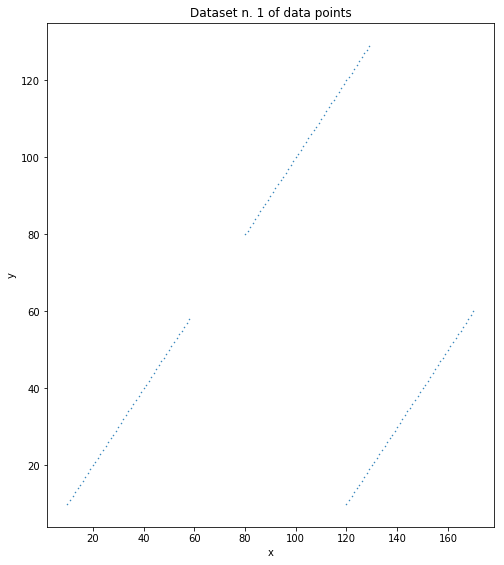

In [2]:
fig = plt.figure(figsize=(8,8))

ax = fig.add_subplot(111)
fig.subplots_adjust(top=1)
ax.set_title('Dataset n. 1 of data points')

ax.set_xlabel(feature_names1[0])
ax.set_ylabel(feature_names1[1])

#plot the dataset
plt.plot(data1[:,0], data1[:,1], '.',markersize=1)

plt.show()

The following is the program for plotting the dataset n.2

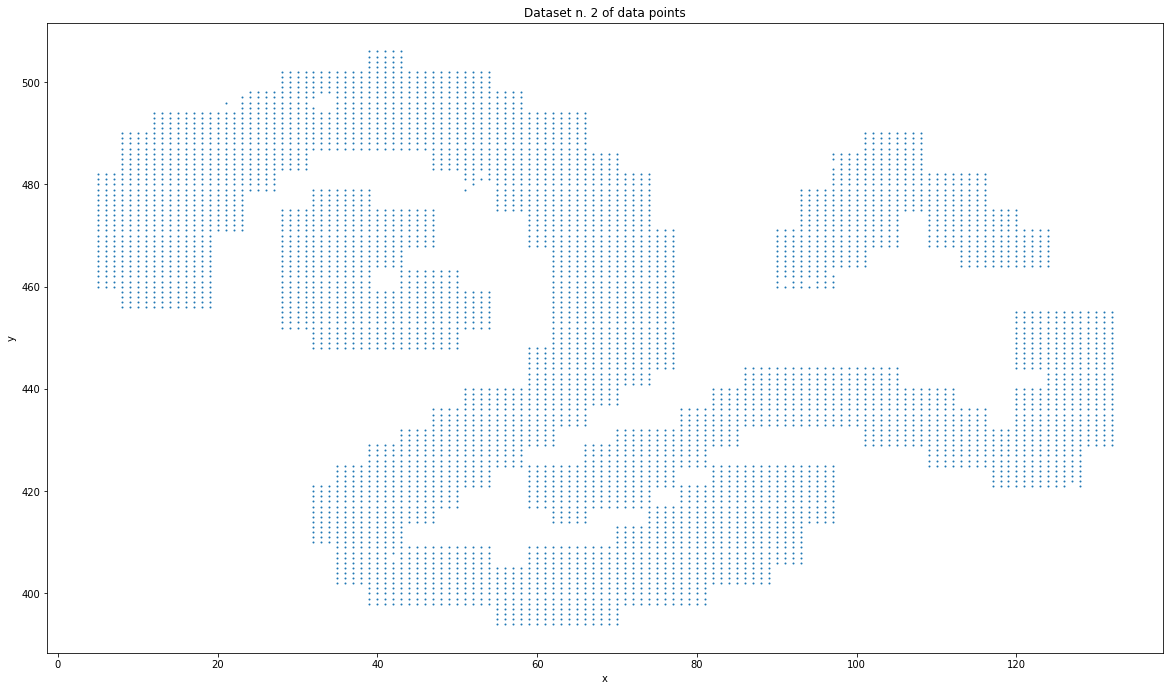

In [3]:
fig = plt.figure(figsize=(20,10))

ax = fig.add_subplot(111)
fig.subplots_adjust(top=1)
ax.set_title('Dataset n. 2 of data points')

ax.set_xlabel(feature_names2[0])
ax.set_ylabel(feature_names2[1])

#plot the dataset
plt.plot(data2[:,0], data2[:,1], '.', markersize=2)

plt.show()

The following is the program for plotting the dataset n.3

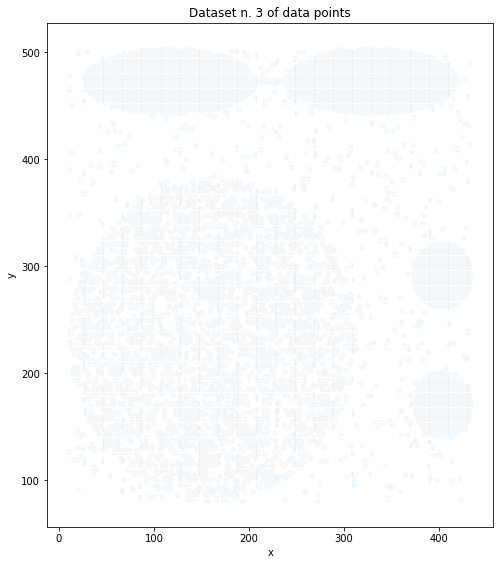

In [4]:
fig = plt.figure(figsize=(8,8))

ax = fig.add_subplot(111)
fig.subplots_adjust(top=1)
ax.set_title('Dataset n. 3 of data points')

ax.set_xlabel(feature_names3[0])
ax.set_ylabel(feature_names3[1])

#plot the dataset
plt.plot(data3[:,0], data3[:,1], '.', markersize=0.5, markeredgecolor = 'none')

plt.show()

## In the following program we cluster the dataset n.1 with K-means. 
From the plot of dataset n.1 we see 3 separated clusters. Thus k=3. 

In [5]:
from sklearn.cluster import KMeans

np.random.seed(5)

k=3
kmeans1 = KMeans(n_clusters=k, random_state=0).fit(data1)

i=0
for i in range(n_samples1):
    print("Example n."+str(i)+"=("+str(data1[i,0])+","+str(data1[i,1])+")")
    print("in cluster n."+str(kmeans1.labels_[i]))

Example n.0=(10.0,10.0)
in cluster n.0
Example n.1=(11.0,11.0)
in cluster n.0
Example n.2=(12.0,12.0)
in cluster n.0
Example n.3=(13.0,13.0)
in cluster n.0
Example n.4=(14.0,14.0)
in cluster n.0
Example n.5=(15.0,15.0)
in cluster n.0
Example n.6=(16.0,16.0)
in cluster n.0
Example n.7=(17.0,17.0)
in cluster n.0
Example n.8=(18.0,18.0)
in cluster n.0
Example n.9=(19.0,19.0)
in cluster n.0
Example n.10=(20.0,20.0)
in cluster n.0
Example n.11=(21.0,21.0)
in cluster n.0
Example n.12=(22.0,22.0)
in cluster n.0
Example n.13=(23.0,23.0)
in cluster n.0
Example n.14=(24.0,24.0)
in cluster n.0
Example n.15=(25.0,25.0)
in cluster n.0
Example n.16=(26.0,26.0)
in cluster n.0
Example n.17=(27.0,27.0)
in cluster n.0
Example n.18=(28.0,28.0)
in cluster n.0
Example n.19=(29.0,29.0)
in cluster n.0
Example n.20=(30.0,30.0)
in cluster n.0
Example n.21=(31.0,31.0)
in cluster n.0
Example n.22=(32.0,32.0)
in cluster n.0
Example n.23=(33.0,33.0)
in cluster n.0
Example n.24=(34.0,34.0)
in cluster n.0
Example n.

In the following program we plot the clusters

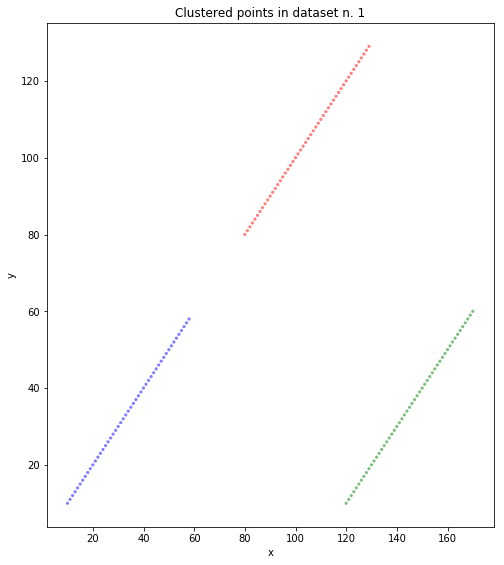

In [6]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8,8))

ax = fig.add_subplot(111)
fig.subplots_adjust(top=1)
ax.set_title('Clustered points in dataset n. 1')

ax.set_xlabel('x')
ax.set_ylabel('y')

# set the list of colors to be selected when plotting the different clusters
color=['b','g','r','c','m','y','k','w']
    
#plot the dataset
for clu in range(k):
    # collect the sequence of cooordinates of the points in each given cluster (determined by clu)
    data_list_x = [data1[i,0] for i in range(n_samples1) if kmeans1.labels_[i]==clu]
    data_list_y = [data1[i,1] for i in range(n_samples1) if kmeans1.labels_[i]==clu]
    plt.scatter(data_list_x, data_list_y, s=10, edgecolors='none', c=color[clu], alpha=0.5)

plt.show()

In the following cell we perform clustering with K-means on dataset2

In [7]:
np.random.seed(5)

k=3
kmeans2 = KMeans(n_clusters=k, random_state=0).fit(data2)

i=0
for i in range(n_samples2):
    print("Example n."+str(i)+"=("+str(data2[i,0])+","+str(data2[i,1])+")")
    print("in cluster n."+str(kmeans2.labels_[i]))

Example n.0=(5.0,482.0)
in cluster n.2
Example n.1=(5.0,481.0)
in cluster n.2
Example n.2=(5.0,480.0)
in cluster n.2
Example n.3=(5.0,479.0)
in cluster n.2
Example n.4=(5.0,478.0)
in cluster n.2
Example n.5=(5.0,477.0)
in cluster n.2
Example n.6=(5.0,476.0)
in cluster n.2
Example n.7=(5.0,475.0)
in cluster n.2
Example n.8=(5.0,474.0)
in cluster n.2
Example n.9=(5.0,473.0)
in cluster n.2
Example n.10=(5.0,472.0)
in cluster n.2
Example n.11=(5.0,471.0)
in cluster n.2
Example n.12=(5.0,470.0)
in cluster n.2
Example n.13=(5.0,469.0)
in cluster n.2
Example n.14=(5.0,468.0)
in cluster n.2
Example n.15=(5.0,467.0)
in cluster n.2
Example n.16=(5.0,466.0)
in cluster n.2
Example n.17=(5.0,465.0)
in cluster n.2
Example n.18=(5.0,464.0)
in cluster n.2
Example n.19=(5.0,463.0)
in cluster n.2
Example n.20=(5.0,462.0)
in cluster n.2
Example n.21=(5.0,461.0)
in cluster n.2
Example n.22=(5.0,460.0)
in cluster n.2
Example n.23=(6.0,482.0)
in cluster n.2
Example n.24=(6.0,481.0)
in cluster n.2
Example n.

Example n.813=(30.0,471.0)
in cluster n.2
Example n.814=(30.0,470.0)
in cluster n.2
Example n.815=(30.0,469.0)
in cluster n.2
Example n.816=(30.0,468.0)
in cluster n.2
Example n.817=(30.0,467.0)
in cluster n.2
Example n.818=(30.0,466.0)
in cluster n.2
Example n.819=(30.0,465.0)
in cluster n.2
Example n.820=(30.0,464.0)
in cluster n.2
Example n.821=(30.0,463.0)
in cluster n.2
Example n.822=(30.0,462.0)
in cluster n.2
Example n.823=(30.0,461.0)
in cluster n.2
Example n.824=(30.0,460.0)
in cluster n.2
Example n.825=(30.0,459.0)
in cluster n.2
Example n.826=(30.0,458.0)
in cluster n.2
Example n.827=(30.0,457.0)
in cluster n.2
Example n.828=(30.0,456.0)
in cluster n.2
Example n.829=(30.0,455.0)
in cluster n.2
Example n.830=(30.0,454.0)
in cluster n.2
Example n.831=(30.0,453.0)
in cluster n.2
Example n.832=(30.0,452.0)
in cluster n.2
Example n.833=(31.0,502.0)
in cluster n.2
Example n.834=(31.0,501.0)
in cluster n.2
Example n.835=(31.0,500.0)
in cluster n.2
Example n.836=(31.0,499.0)
in clus

Example n.1563=(41.0,408.0)
in cluster n.0
Example n.1564=(41.0,407.0)
in cluster n.0
Example n.1565=(41.0,406.0)
in cluster n.0
Example n.1566=(41.0,405.0)
in cluster n.0
Example n.1567=(41.0,404.0)
in cluster n.0
Example n.1568=(41.0,403.0)
in cluster n.0
Example n.1569=(41.0,402.0)
in cluster n.0
Example n.1570=(41.0,401.0)
in cluster n.0
Example n.1571=(41.0,400.0)
in cluster n.0
Example n.1572=(41.0,399.0)
in cluster n.0
Example n.1573=(41.0,398.0)
in cluster n.0
Example n.1574=(42.0,506.0)
in cluster n.2
Example n.1575=(42.0,505.0)
in cluster n.2
Example n.1576=(42.0,504.0)
in cluster n.2
Example n.1577=(42.0,503.0)
in cluster n.2
Example n.1578=(42.0,502.0)
in cluster n.2
Example n.1579=(42.0,501.0)
in cluster n.2
Example n.1580=(42.0,500.0)
in cluster n.2
Example n.1581=(42.0,499.0)
in cluster n.2
Example n.1582=(42.0,498.0)
in cluster n.2
Example n.1583=(42.0,497.0)
in cluster n.2
Example n.1584=(42.0,496.0)
in cluster n.2
Example n.1585=(42.0,495.0)
in cluster n.2
Example n.1

in cluster n.2
Example n.2313=(52.0,480.0)
in cluster n.2
Example n.2314=(52.0,459.0)
in cluster n.2
Example n.2315=(52.0,458.0)
in cluster n.2
Example n.2316=(52.0,457.0)
in cluster n.2
Example n.2317=(52.0,456.0)
in cluster n.2
Example n.2318=(52.0,455.0)
in cluster n.2
Example n.2319=(52.0,454.0)
in cluster n.2
Example n.2320=(52.0,453.0)
in cluster n.2
Example n.2321=(52.0,452.0)
in cluster n.2
Example n.2322=(52.0,440.0)
in cluster n.0
Example n.2323=(52.0,439.0)
in cluster n.0
Example n.2324=(52.0,438.0)
in cluster n.0
Example n.2325=(52.0,437.0)
in cluster n.0
Example n.2326=(52.0,436.0)
in cluster n.0
Example n.2327=(52.0,435.0)
in cluster n.0
Example n.2328=(52.0,434.0)
in cluster n.0
Example n.2329=(52.0,433.0)
in cluster n.0
Example n.2330=(52.0,432.0)
in cluster n.0
Example n.2331=(52.0,431.0)
in cluster n.0
Example n.2332=(52.0,430.0)
in cluster n.0
Example n.2333=(52.0,429.0)
in cluster n.0
Example n.2334=(52.0,428.0)
in cluster n.0
Example n.2335=(52.0,427.0)
in cluster 

in cluster n.0
Example n.3063=(63.0,419.0)
in cluster n.0
Example n.3064=(63.0,418.0)
in cluster n.0
Example n.3065=(63.0,417.0)
in cluster n.0
Example n.3066=(63.0,416.0)
in cluster n.0
Example n.3067=(63.0,415.0)
in cluster n.0
Example n.3068=(63.0,414.0)
in cluster n.0
Example n.3069=(63.0,409.0)
in cluster n.0
Example n.3070=(63.0,408.0)
in cluster n.0
Example n.3071=(63.0,407.0)
in cluster n.0
Example n.3072=(63.0,406.0)
in cluster n.0
Example n.3073=(63.0,405.0)
in cluster n.0
Example n.3074=(63.0,404.0)
in cluster n.0
Example n.3075=(63.0,403.0)
in cluster n.0
Example n.3076=(63.0,402.0)
in cluster n.0
Example n.3077=(63.0,401.0)
in cluster n.0
Example n.3078=(63.0,400.0)
in cluster n.0
Example n.3079=(63.0,399.0)
in cluster n.0
Example n.3080=(63.0,398.0)
in cluster n.0
Example n.3081=(63.0,397.0)
in cluster n.0
Example n.3082=(63.0,396.0)
in cluster n.0
Example n.3083=(63.0,395.0)
in cluster n.0
Example n.3084=(63.0,394.0)
in cluster n.0
Example n.3085=(64.0,494.0)
in cluster 

Example n.3812=(72.0,418.0)
in cluster n.0
Example n.3813=(72.0,417.0)
in cluster n.0
Example n.3814=(72.0,413.0)
in cluster n.0
Example n.3815=(72.0,412.0)
in cluster n.0
Example n.3816=(72.0,411.0)
in cluster n.0
Example n.3817=(72.0,410.0)
in cluster n.0
Example n.3818=(72.0,409.0)
in cluster n.0
Example n.3819=(72.0,408.0)
in cluster n.0
Example n.3820=(72.0,407.0)
in cluster n.0
Example n.3821=(72.0,406.0)
in cluster n.0
Example n.3822=(72.0,405.0)
in cluster n.0
Example n.3823=(72.0,404.0)
in cluster n.0
Example n.3824=(72.0,403.0)
in cluster n.0
Example n.3825=(72.0,402.0)
in cluster n.0
Example n.3826=(72.0,401.0)
in cluster n.0
Example n.3827=(72.0,400.0)
in cluster n.0
Example n.3828=(72.0,399.0)
in cluster n.0
Example n.3829=(72.0,398.0)
in cluster n.0
Example n.3830=(73.0,482.0)
in cluster n.2
Example n.3831=(73.0,481.0)
in cluster n.2
Example n.3832=(73.0,480.0)
in cluster n.2
Example n.3833=(73.0,479.0)
in cluster n.2
Example n.3834=(73.0,478.0)
in cluster n.2
Example n.3

Example n.4562=(89.0,439.0)
in cluster n.1
Example n.4563=(89.0,438.0)
in cluster n.1
Example n.4564=(89.0,437.0)
in cluster n.1
Example n.4565=(89.0,436.0)
in cluster n.1
Example n.4566=(89.0,435.0)
in cluster n.1
Example n.4567=(89.0,434.0)
in cluster n.1
Example n.4568=(89.0,433.0)
in cluster n.1
Example n.4569=(89.0,425.0)
in cluster n.0
Example n.4570=(89.0,424.0)
in cluster n.0
Example n.4571=(89.0,423.0)
in cluster n.0
Example n.4572=(89.0,422.0)
in cluster n.0
Example n.4573=(89.0,421.0)
in cluster n.0
Example n.4574=(89.0,420.0)
in cluster n.0
Example n.4575=(89.0,419.0)
in cluster n.0
Example n.4576=(89.0,418.0)
in cluster n.0
Example n.4577=(89.0,417.0)
in cluster n.0
Example n.4578=(89.0,416.0)
in cluster n.0
Example n.4579=(89.0,415.0)
in cluster n.0
Example n.4580=(89.0,414.0)
in cluster n.0
Example n.4581=(89.0,413.0)
in cluster n.0
Example n.4582=(89.0,412.0)
in cluster n.0
Example n.4583=(89.0,411.0)
in cluster n.0
Example n.4584=(89.0,410.0)
in cluster n.0
Example n.4

in cluster n.1
Example n.5562=(116.0,481.0)
in cluster n.1
Example n.5563=(116.0,480.0)
in cluster n.1
Example n.5564=(116.0,479.0)
in cluster n.1
Example n.5565=(116.0,478.0)
in cluster n.1
Example n.5566=(116.0,477.0)
in cluster n.1
Example n.5567=(116.0,476.0)
in cluster n.1
Example n.5568=(116.0,475.0)
in cluster n.1
Example n.5569=(116.0,474.0)
in cluster n.1
Example n.5570=(116.0,473.0)
in cluster n.1
Example n.5571=(116.0,472.0)
in cluster n.1
Example n.5572=(116.0,471.0)
in cluster n.1
Example n.5573=(116.0,470.0)
in cluster n.1
Example n.5574=(116.0,469.0)
in cluster n.1
Example n.5575=(116.0,468.0)
in cluster n.1
Example n.5576=(116.0,467.0)
in cluster n.1
Example n.5577=(116.0,466.0)
in cluster n.1
Example n.5578=(116.0,465.0)
in cluster n.1
Example n.5579=(116.0,464.0)
in cluster n.1
Example n.5580=(116.0,436.0)
in cluster n.1
Example n.5581=(116.0,435.0)
in cluster n.1
Example n.5582=(116.0,434.0)
in cluster n.1
Example n.5583=(116.0,433.0)
in cluster n.1
Example n.5584=(1

In the following we plot clustering results on dataset2

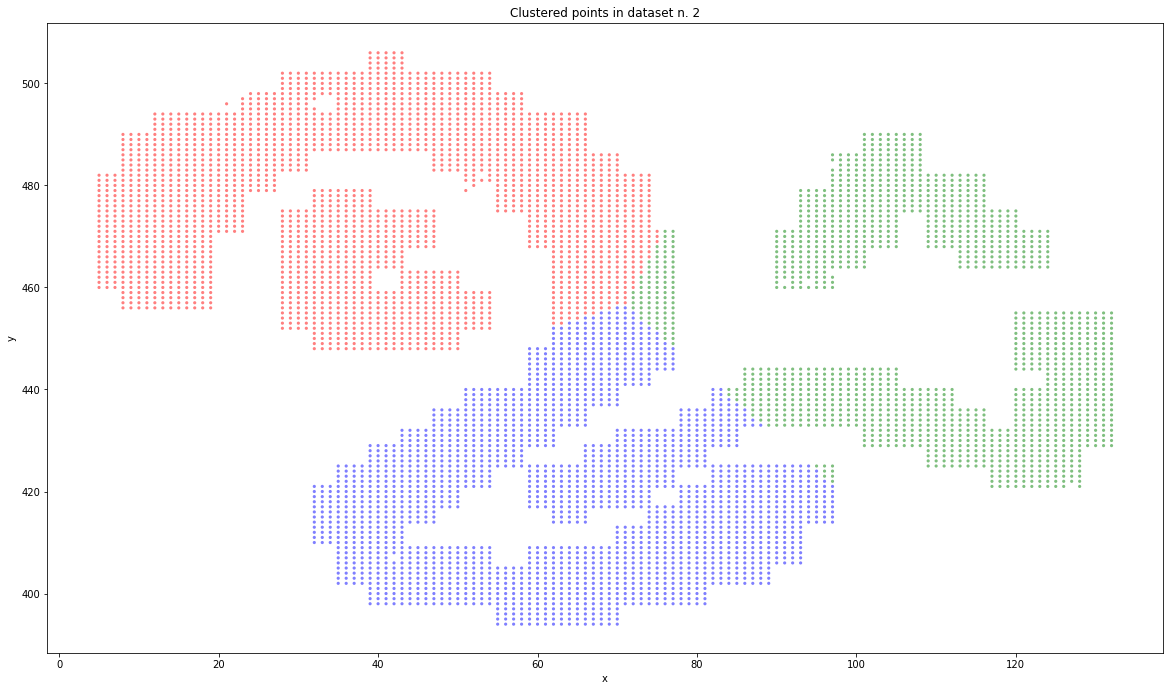

In [8]:
fig = plt.figure(figsize=(20,10))

ax = fig.add_subplot(111)
fig.subplots_adjust(top=1)
ax.set_title('Clustered points in dataset n. 2')

ax.set_xlabel('x')
ax.set_ylabel('y')

# set the list of colors to be selected when plotting the different clusters
color=['b','g','r','c','m','y','k','w']
    
#plot the dataset
for clu in range(k):
    # collect the sequence of cooordinates of the points in each given cluster (determined by clu)
    data_list_x = [data2[i,0] for i in range(n_samples2) if kmeans2.labels_[i]==clu]
    data_list_y = [data2[i,1] for i in range(n_samples2) if kmeans2.labels_[i]==clu]
    plt.scatter(data_list_x, data_list_y, s=10, edgecolors='none', c=color[clu], alpha=0.5)

plt.show()

We perform clustering with K-means on the remaining dataset3

In [9]:
np.random.seed(5)

k=4
kmeans3 = KMeans(n_clusters=k, random_state=0).fit(data3)

i=0
for i in range(n_samples3):
    print("Example n."+str(i)+"=("+str(data3[i,0])+","+str(data3[i,1])+")")
    print("in cluster n."+str(kmeans3.labels_[i]))

Example n.0=(9.0,480.0)
in cluster n.3
Example n.1=(9.0,479.0)
in cluster n.3
Example n.2=(9.0,478.0)
in cluster n.3
Example n.3=(9.0,477.0)
in cluster n.3
Example n.4=(9.0,467.0)
in cluster n.3
Example n.5=(9.0,466.0)
in cluster n.3
Example n.6=(9.0,465.0)
in cluster n.3
Example n.7=(9.0,464.0)
in cluster n.3
Example n.8=(9.0,392.0)
in cluster n.3
Example n.9=(9.0,391.0)
in cluster n.3
Example n.10=(9.0,390.0)
in cluster n.3
Example n.11=(9.0,350.0)
in cluster n.3
Example n.12=(9.0,349.0)
in cluster n.3
Example n.13=(9.0,348.0)
in cluster n.3
Example n.14=(9.0,347.0)
in cluster n.3
Example n.15=(9.0,290.0)
in cluster n.1
Example n.16=(9.0,289.0)
in cluster n.1
Example n.17=(9.0,288.0)
in cluster n.1
Example n.18=(9.0,287.0)
in cluster n.1
Example n.19=(9.0,240.0)
in cluster n.1
Example n.20=(9.0,239.0)
in cluster n.1
Example n.21=(9.0,238.0)
in cluster n.1
Example n.22=(9.0,231.0)
in cluster n.1
Example n.23=(9.0,230.0)
in cluster n.1
Example n.24=(9.0,229.0)
in cluster n.1
Example n.

in cluster n.1
Example n.937=(20.0,93.0)
in cluster n.1
Example n.938=(20.0,92.0)
in cluster n.1
Example n.939=(20.0,91.0)
in cluster n.1
Example n.940=(20.0,90.0)
in cluster n.1
Example n.941=(20.0,89.0)
in cluster n.1
Example n.942=(21.0,501.0)
in cluster n.3
Example n.943=(21.0,500.0)
in cluster n.3
Example n.944=(21.0,499.0)
in cluster n.3
Example n.945=(21.0,498.0)
in cluster n.3
Example n.946=(21.0,497.0)
in cluster n.3
Example n.947=(21.0,383.0)
in cluster n.3
Example n.948=(21.0,382.0)
in cluster n.3
Example n.949=(21.0,381.0)
in cluster n.3
Example n.950=(21.0,380.0)
in cluster n.3
Example n.951=(21.0,379.0)
in cluster n.3
Example n.952=(21.0,369.0)
in cluster n.3
Example n.953=(21.0,351.0)
in cluster n.3
Example n.954=(21.0,350.0)
in cluster n.3
Example n.955=(21.0,349.0)
in cluster n.3
Example n.956=(21.0,348.0)
in cluster n.3
Example n.957=(21.0,347.0)
in cluster n.3
Example n.958=(21.0,346.0)
in cluster n.3
Example n.959=(21.0,307.0)
in cluster n.3
Example n.960=(21.0,306.

Example n.1686=(26.0,252.0)
in cluster n.1
Example n.1687=(26.0,251.0)
in cluster n.1
Example n.1688=(26.0,250.0)
in cluster n.1
Example n.1689=(26.0,249.0)
in cluster n.1
Example n.1690=(26.0,248.0)
in cluster n.1
Example n.1691=(26.0,247.0)
in cluster n.1
Example n.1692=(26.0,246.0)
in cluster n.1
Example n.1693=(26.0,245.0)
in cluster n.1
Example n.1694=(26.0,244.0)
in cluster n.1
Example n.1695=(26.0,243.0)
in cluster n.1
Example n.1696=(26.0,242.0)
in cluster n.1
Example n.1697=(26.0,241.0)
in cluster n.1
Example n.1698=(26.0,240.0)
in cluster n.1
Example n.1699=(26.0,239.0)
in cluster n.1
Example n.1700=(26.0,238.0)
in cluster n.1
Example n.1701=(26.0,237.0)
in cluster n.1
Example n.1702=(26.0,236.0)
in cluster n.1
Example n.1703=(26.0,234.0)
in cluster n.1
Example n.1704=(26.0,233.0)
in cluster n.1
Example n.1705=(26.0,232.0)
in cluster n.1
Example n.1706=(26.0,231.0)
in cluster n.1
Example n.1707=(26.0,230.0)
in cluster n.1
Example n.1708=(26.0,229.0)
in cluster n.1
Example n.1

Example n.2436=(31.0,281.0)
in cluster n.1
Example n.2437=(31.0,280.0)
in cluster n.1
Example n.2438=(31.0,279.0)
in cluster n.1
Example n.2439=(31.0,278.0)
in cluster n.1
Example n.2440=(31.0,277.0)
in cluster n.1
Example n.2441=(31.0,276.0)
in cluster n.1
Example n.2442=(31.0,275.0)
in cluster n.1
Example n.2443=(31.0,271.0)
in cluster n.1
Example n.2444=(31.0,270.0)
in cluster n.1
Example n.2445=(31.0,269.0)
in cluster n.1
Example n.2446=(31.0,268.0)
in cluster n.1
Example n.2447=(31.0,267.0)
in cluster n.1
Example n.2448=(31.0,266.0)
in cluster n.1
Example n.2449=(31.0,265.0)
in cluster n.1
Example n.2450=(31.0,264.0)
in cluster n.1
Example n.2451=(31.0,263.0)
in cluster n.1
Example n.2452=(31.0,262.0)
in cluster n.1
Example n.2453=(31.0,261.0)
in cluster n.1
Example n.2454=(31.0,260.0)
in cluster n.1
Example n.2455=(31.0,259.0)
in cluster n.1
Example n.2456=(31.0,258.0)
in cluster n.1
Example n.2457=(31.0,257.0)
in cluster n.1
Example n.2458=(31.0,256.0)
in cluster n.1
Example n.2

in cluster n.3
Example n.3436=(37.0,379.0)
in cluster n.3
Example n.3437=(37.0,378.0)
in cluster n.3
Example n.3438=(37.0,377.0)
in cluster n.3
Example n.3439=(37.0,376.0)
in cluster n.3
Example n.3440=(37.0,312.0)
in cluster n.3
Example n.3441=(37.0,311.0)
in cluster n.3
Example n.3442=(37.0,310.0)
in cluster n.3
Example n.3443=(37.0,309.0)
in cluster n.3
Example n.3444=(37.0,308.0)
in cluster n.3
Example n.3445=(37.0,307.0)
in cluster n.3
Example n.3446=(37.0,306.0)
in cluster n.3
Example n.3447=(37.0,305.0)
in cluster n.3
Example n.3448=(37.0,304.0)
in cluster n.3
Example n.3449=(37.0,303.0)
in cluster n.3
Example n.3450=(37.0,302.0)
in cluster n.3
Example n.3451=(37.0,301.0)
in cluster n.1
Example n.3452=(37.0,300.0)
in cluster n.1
Example n.3453=(37.0,299.0)
in cluster n.1
Example n.3454=(37.0,298.0)
in cluster n.1
Example n.3455=(37.0,297.0)
in cluster n.1
Example n.3456=(37.0,293.0)
in cluster n.1
Example n.3457=(37.0,292.0)
in cluster n.1
Example n.3458=(37.0,291.0)
in cluster 

in cluster n.1
Example n.4436=(42.0,276.0)
in cluster n.1
Example n.4437=(42.0,275.0)
in cluster n.1
Example n.4438=(42.0,274.0)
in cluster n.1
Example n.4439=(42.0,271.0)
in cluster n.1
Example n.4440=(42.0,270.0)
in cluster n.1
Example n.4441=(42.0,269.0)
in cluster n.1
Example n.4442=(42.0,268.0)
in cluster n.1
Example n.4443=(42.0,267.0)
in cluster n.1
Example n.4444=(42.0,266.0)
in cluster n.1
Example n.4445=(42.0,265.0)
in cluster n.1
Example n.4446=(42.0,264.0)
in cluster n.1
Example n.4447=(42.0,263.0)
in cluster n.1
Example n.4448=(42.0,260.0)
in cluster n.1
Example n.4449=(42.0,259.0)
in cluster n.1
Example n.4450=(42.0,258.0)
in cluster n.1
Example n.4451=(42.0,257.0)
in cluster n.1
Example n.4452=(42.0,256.0)
in cluster n.1
Example n.4453=(42.0,255.0)
in cluster n.1
Example n.4454=(42.0,254.0)
in cluster n.1
Example n.4455=(42.0,250.0)
in cluster n.1
Example n.4456=(42.0,249.0)
in cluster n.1
Example n.4457=(42.0,248.0)
in cluster n.1
Example n.4458=(42.0,247.0)
in cluster 

Example n.5435=(47.0,310.0)
in cluster n.3
Example n.5436=(47.0,308.0)
in cluster n.3
Example n.5437=(47.0,307.0)
in cluster n.3
Example n.5438=(47.0,306.0)
in cluster n.3
Example n.5439=(47.0,305.0)
in cluster n.3
Example n.5440=(47.0,304.0)
in cluster n.3
Example n.5441=(47.0,303.0)
in cluster n.3
Example n.5442=(47.0,302.0)
in cluster n.3
Example n.5443=(47.0,301.0)
in cluster n.3
Example n.5444=(47.0,300.0)
in cluster n.1
Example n.5445=(47.0,299.0)
in cluster n.1
Example n.5446=(47.0,298.0)
in cluster n.1
Example n.5447=(47.0,297.0)
in cluster n.1
Example n.5448=(47.0,296.0)
in cluster n.1
Example n.5449=(47.0,295.0)
in cluster n.1
Example n.5450=(47.0,294.0)
in cluster n.1
Example n.5451=(47.0,287.0)
in cluster n.1
Example n.5452=(47.0,286.0)
in cluster n.1
Example n.5453=(47.0,285.0)
in cluster n.1
Example n.5454=(47.0,284.0)
in cluster n.1
Example n.5455=(47.0,283.0)
in cluster n.1
Example n.5456=(47.0,282.0)
in cluster n.1
Example n.5457=(47.0,281.0)
in cluster n.1
Example n.5

Example n.6293=(51.0,247.0)
in cluster n.1
Example n.6294=(51.0,246.0)
in cluster n.1
Example n.6295=(51.0,245.0)
in cluster n.1
Example n.6296=(51.0,244.0)
in cluster n.1
Example n.6297=(51.0,243.0)
in cluster n.1
Example n.6298=(51.0,242.0)
in cluster n.1
Example n.6299=(51.0,241.0)
in cluster n.1
Example n.6300=(51.0,240.0)
in cluster n.1
Example n.6301=(51.0,239.0)
in cluster n.1
Example n.6302=(51.0,238.0)
in cluster n.1
Example n.6303=(51.0,237.0)
in cluster n.1
Example n.6304=(51.0,236.0)
in cluster n.1
Example n.6305=(51.0,235.0)
in cluster n.1
Example n.6306=(51.0,234.0)
in cluster n.1
Example n.6307=(51.0,230.0)
in cluster n.1
Example n.6308=(51.0,229.0)
in cluster n.1
Example n.6309=(51.0,228.0)
in cluster n.1
Example n.6310=(51.0,227.0)
in cluster n.1
Example n.6311=(51.0,226.0)
in cluster n.1
Example n.6312=(51.0,225.0)
in cluster n.1
Example n.6313=(51.0,215.0)
in cluster n.1
Example n.6314=(51.0,214.0)
in cluster n.1
Example n.6315=(51.0,213.0)
in cluster n.1
Example n.6

in cluster n.1
Example n.7185=(55.0,190.0)
in cluster n.1
Example n.7186=(55.0,189.0)
in cluster n.1
Example n.7187=(55.0,188.0)
in cluster n.1
Example n.7188=(55.0,187.0)
in cluster n.1
Example n.7189=(55.0,186.0)
in cluster n.1
Example n.7190=(55.0,185.0)
in cluster n.1
Example n.7191=(55.0,184.0)
in cluster n.1
Example n.7192=(55.0,183.0)
in cluster n.1
Example n.7193=(55.0,182.0)
in cluster n.1
Example n.7194=(55.0,181.0)
in cluster n.1
Example n.7195=(55.0,180.0)
in cluster n.1
Example n.7196=(55.0,179.0)
in cluster n.1
Example n.7197=(55.0,178.0)
in cluster n.1
Example n.7198=(55.0,177.0)
in cluster n.1
Example n.7199=(55.0,176.0)
in cluster n.1
Example n.7200=(55.0,175.0)
in cluster n.1
Example n.7201=(55.0,174.0)
in cluster n.1
Example n.7202=(55.0,173.0)
in cluster n.1
Example n.7203=(55.0,172.0)
in cluster n.1
Example n.7204=(55.0,171.0)
in cluster n.1
Example n.7205=(55.0,170.0)
in cluster n.1
Example n.7206=(55.0,169.0)
in cluster n.1
Example n.7207=(55.0,168.0)
in cluster 

in cluster n.1
Example n.8084=(59.0,265.0)
in cluster n.1
Example n.8085=(59.0,264.0)
in cluster n.1
Example n.8086=(59.0,258.0)
in cluster n.1
Example n.8087=(59.0,257.0)
in cluster n.1
Example n.8088=(59.0,256.0)
in cluster n.1
Example n.8089=(59.0,252.0)
in cluster n.1
Example n.8090=(59.0,251.0)
in cluster n.1
Example n.8091=(59.0,250.0)
in cluster n.1
Example n.8092=(59.0,246.0)
in cluster n.1
Example n.8093=(59.0,245.0)
in cluster n.1
Example n.8094=(59.0,244.0)
in cluster n.1
Example n.8095=(59.0,243.0)
in cluster n.1
Example n.8096=(59.0,242.0)
in cluster n.1
Example n.8097=(59.0,237.0)
in cluster n.1
Example n.8098=(59.0,220.0)
in cluster n.1
Example n.8099=(59.0,219.0)
in cluster n.1
Example n.8100=(59.0,218.0)
in cluster n.1
Example n.8101=(59.0,217.0)
in cluster n.1
Example n.8102=(59.0,216.0)
in cluster n.1
Example n.8103=(59.0,210.0)
in cluster n.1
Example n.8104=(59.0,209.0)
in cluster n.1
Example n.8105=(59.0,208.0)
in cluster n.1
Example n.8106=(59.0,207.0)
in cluster 

Example n.8934=(63.0,271.0)
in cluster n.1
Example n.8935=(63.0,270.0)
in cluster n.1
Example n.8936=(63.0,269.0)
in cluster n.1
Example n.8937=(63.0,268.0)
in cluster n.1
Example n.8938=(63.0,264.0)
in cluster n.1
Example n.8939=(63.0,263.0)
in cluster n.1
Example n.8940=(63.0,262.0)
in cluster n.1
Example n.8941=(63.0,261.0)
in cluster n.1
Example n.8942=(63.0,260.0)
in cluster n.1
Example n.8943=(63.0,259.0)
in cluster n.1
Example n.8944=(63.0,258.0)
in cluster n.1
Example n.8945=(63.0,257.0)
in cluster n.1
Example n.8946=(63.0,256.0)
in cluster n.1
Example n.8947=(63.0,255.0)
in cluster n.1
Example n.8948=(63.0,254.0)
in cluster n.1
Example n.8949=(63.0,252.0)
in cluster n.1
Example n.8950=(63.0,251.0)
in cluster n.1
Example n.8951=(63.0,250.0)
in cluster n.1
Example n.8952=(63.0,249.0)
in cluster n.1
Example n.8953=(63.0,248.0)
in cluster n.1
Example n.8954=(63.0,247.0)
in cluster n.1
Example n.8955=(63.0,245.0)
in cluster n.1
Example n.8956=(63.0,244.0)
in cluster n.1
Example n.8

Example n.9934=(67.0,181.0)
in cluster n.1
Example n.9935=(67.0,180.0)
in cluster n.1
Example n.9936=(67.0,179.0)
in cluster n.1
Example n.9937=(67.0,178.0)
in cluster n.1
Example n.9938=(67.0,174.0)
in cluster n.1
Example n.9939=(67.0,173.0)
in cluster n.1
Example n.9940=(67.0,172.0)
in cluster n.1
Example n.9941=(67.0,171.0)
in cluster n.1
Example n.9942=(67.0,170.0)
in cluster n.1
Example n.9943=(67.0,169.0)
in cluster n.1
Example n.9944=(67.0,158.0)
in cluster n.1
Example n.9945=(67.0,157.0)
in cluster n.1
Example n.9946=(67.0,156.0)
in cluster n.1
Example n.9947=(67.0,155.0)
in cluster n.1
Example n.9948=(67.0,154.0)
in cluster n.1
Example n.9949=(67.0,153.0)
in cluster n.1
Example n.9950=(67.0,152.0)
in cluster n.1
Example n.9951=(67.0,151.0)
in cluster n.1
Example n.9952=(67.0,150.0)
in cluster n.1
Example n.9953=(67.0,149.0)
in cluster n.1
Example n.9954=(67.0,148.0)
in cluster n.1
Example n.9955=(67.0,144.0)
in cluster n.1
Example n.9956=(67.0,143.0)
in cluster n.1
Example n.9

in cluster n.3
Example n.10934=(72.0,447.0)
in cluster n.3
Example n.10935=(72.0,446.0)
in cluster n.3
Example n.10936=(72.0,423.0)
in cluster n.3
Example n.10937=(72.0,422.0)
in cluster n.3
Example n.10938=(72.0,421.0)
in cluster n.3
Example n.10939=(72.0,360.0)
in cluster n.3
Example n.10940=(72.0,359.0)
in cluster n.3
Example n.10941=(72.0,358.0)
in cluster n.3
Example n.10942=(72.0,357.0)
in cluster n.3
Example n.10943=(72.0,356.0)
in cluster n.3
Example n.10944=(72.0,355.0)
in cluster n.3
Example n.10945=(72.0,352.0)
in cluster n.3
Example n.10946=(72.0,351.0)
in cluster n.3
Example n.10947=(72.0,350.0)
in cluster n.3
Example n.10948=(72.0,349.0)
in cluster n.3
Example n.10949=(72.0,348.0)
in cluster n.3
Example n.10950=(72.0,347.0)
in cluster n.3
Example n.10951=(72.0,345.0)
in cluster n.3
Example n.10952=(72.0,344.0)
in cluster n.3
Example n.10953=(72.0,343.0)
in cluster n.3
Example n.10954=(72.0,342.0)
in cluster n.3
Example n.10955=(72.0,338.0)
in cluster n.3
Example n.10956=(

in cluster n.3
Example n.11934=(76.0,348.0)
in cluster n.3
Example n.11935=(76.0,347.0)
in cluster n.3
Example n.11936=(76.0,346.0)
in cluster n.3
Example n.11937=(76.0,345.0)
in cluster n.3
Example n.11938=(76.0,344.0)
in cluster n.3
Example n.11939=(76.0,343.0)
in cluster n.3
Example n.11940=(76.0,342.0)
in cluster n.3
Example n.11941=(76.0,341.0)
in cluster n.3
Example n.11942=(76.0,340.0)
in cluster n.3
Example n.11943=(76.0,339.0)
in cluster n.3
Example n.11944=(76.0,338.0)
in cluster n.3
Example n.11945=(76.0,337.0)
in cluster n.3
Example n.11946=(76.0,309.0)
in cluster n.3
Example n.11947=(76.0,308.0)
in cluster n.3
Example n.11948=(76.0,307.0)
in cluster n.3
Example n.11949=(76.0,306.0)
in cluster n.3
Example n.11950=(76.0,305.0)
in cluster n.3
Example n.11951=(76.0,304.0)
in cluster n.3
Example n.11952=(76.0,303.0)
in cluster n.3
Example n.11953=(76.0,302.0)
in cluster n.3
Example n.11954=(76.0,299.0)
in cluster n.1
Example n.11955=(76.0,298.0)
in cluster n.1
Example n.11956=(

Example n.12933=(80.0,330.0)
in cluster n.3
Example n.12934=(80.0,329.0)
in cluster n.3
Example n.12935=(80.0,328.0)
in cluster n.3
Example n.12936=(80.0,327.0)
in cluster n.3
Example n.12937=(80.0,326.0)
in cluster n.3
Example n.12938=(80.0,325.0)
in cluster n.3
Example n.12939=(80.0,324.0)
in cluster n.3
Example n.12940=(80.0,323.0)
in cluster n.3
Example n.12941=(80.0,322.0)
in cluster n.3
Example n.12942=(80.0,317.0)
in cluster n.3
Example n.12943=(80.0,316.0)
in cluster n.3
Example n.12944=(80.0,315.0)
in cluster n.3
Example n.12945=(80.0,314.0)
in cluster n.3
Example n.12946=(80.0,313.0)
in cluster n.3
Example n.12947=(80.0,312.0)
in cluster n.3
Example n.12948=(80.0,309.0)
in cluster n.3
Example n.12949=(80.0,308.0)
in cluster n.3
Example n.12950=(80.0,307.0)
in cluster n.3
Example n.12951=(80.0,306.0)
in cluster n.3
Example n.12952=(80.0,305.0)
in cluster n.3
Example n.12953=(80.0,304.0)
in cluster n.3
Example n.12954=(80.0,303.0)
in cluster n.3
Example n.12955=(80.0,302.0)
in 

Example n.13933=(84.0,493.0)
in cluster n.3
Example n.13934=(84.0,492.0)
in cluster n.3
Example n.13935=(84.0,491.0)
in cluster n.3
Example n.13936=(84.0,490.0)
in cluster n.3
Example n.13937=(84.0,489.0)
in cluster n.3
Example n.13938=(84.0,488.0)
in cluster n.3
Example n.13939=(84.0,487.0)
in cluster n.3
Example n.13940=(84.0,486.0)
in cluster n.3
Example n.13941=(84.0,485.0)
in cluster n.3
Example n.13942=(84.0,484.0)
in cluster n.3
Example n.13943=(84.0,483.0)
in cluster n.3
Example n.13944=(84.0,482.0)
in cluster n.3
Example n.13945=(84.0,481.0)
in cluster n.3
Example n.13946=(84.0,480.0)
in cluster n.3
Example n.13947=(84.0,479.0)
in cluster n.3
Example n.13948=(84.0,478.0)
in cluster n.3
Example n.13949=(84.0,477.0)
in cluster n.3
Example n.13950=(84.0,476.0)
in cluster n.3
Example n.13951=(84.0,475.0)
in cluster n.3
Example n.13952=(84.0,474.0)
in cluster n.3
Example n.13953=(84.0,473.0)
in cluster n.3
Example n.13954=(84.0,472.0)
in cluster n.3
Example n.13955=(84.0,471.0)
in 

in cluster n.1
Example n.14933=(87.0,242.0)
in cluster n.1
Example n.14934=(87.0,241.0)
in cluster n.1
Example n.14935=(87.0,239.0)
in cluster n.1
Example n.14936=(87.0,238.0)
in cluster n.1
Example n.14937=(87.0,237.0)
in cluster n.1
Example n.14938=(87.0,236.0)
in cluster n.1
Example n.14939=(87.0,235.0)
in cluster n.1
Example n.14940=(87.0,234.0)
in cluster n.1
Example n.14941=(87.0,233.0)
in cluster n.1
Example n.14942=(87.0,232.0)
in cluster n.1
Example n.14943=(87.0,231.0)
in cluster n.1
Example n.14944=(87.0,230.0)
in cluster n.1
Example n.14945=(87.0,227.0)
in cluster n.1
Example n.14946=(87.0,226.0)
in cluster n.1
Example n.14947=(87.0,225.0)
in cluster n.1
Example n.14948=(87.0,224.0)
in cluster n.1
Example n.14949=(87.0,223.0)
in cluster n.1
Example n.14950=(87.0,222.0)
in cluster n.1
Example n.14951=(87.0,221.0)
in cluster n.1
Example n.14952=(87.0,214.0)
in cluster n.1
Example n.14953=(87.0,213.0)
in cluster n.1
Example n.14954=(87.0,212.0)
in cluster n.1
Example n.14955=(

in cluster n.1
Example n.15933=(91.0,232.0)
in cluster n.1
Example n.15934=(91.0,231.0)
in cluster n.1
Example n.15935=(91.0,217.0)
in cluster n.1
Example n.15936=(91.0,216.0)
in cluster n.1
Example n.15937=(91.0,215.0)
in cluster n.1
Example n.15938=(91.0,214.0)
in cluster n.1
Example n.15939=(91.0,213.0)
in cluster n.1
Example n.15940=(91.0,212.0)
in cluster n.1
Example n.15941=(91.0,206.0)
in cluster n.1
Example n.15942=(91.0,199.0)
in cluster n.1
Example n.15943=(91.0,198.0)
in cluster n.1
Example n.15944=(91.0,197.0)
in cluster n.1
Example n.15945=(91.0,196.0)
in cluster n.1
Example n.15946=(91.0,195.0)
in cluster n.1
Example n.15947=(91.0,194.0)
in cluster n.1
Example n.15948=(91.0,193.0)
in cluster n.1
Example n.15949=(91.0,192.0)
in cluster n.1
Example n.15950=(91.0,191.0)
in cluster n.1
Example n.15951=(91.0,190.0)
in cluster n.1
Example n.15952=(91.0,182.0)
in cluster n.1
Example n.15953=(91.0,181.0)
in cluster n.1
Example n.15954=(91.0,180.0)
in cluster n.1
Example n.15955=(

Example n.16932=(95.0,210.0)
in cluster n.1
Example n.16933=(95.0,209.0)
in cluster n.1
Example n.16934=(95.0,208.0)
in cluster n.1
Example n.16935=(95.0,207.0)
in cluster n.1
Example n.16936=(95.0,206.0)
in cluster n.1
Example n.16937=(95.0,205.0)
in cluster n.1
Example n.16938=(95.0,204.0)
in cluster n.1
Example n.16939=(95.0,203.0)
in cluster n.1
Example n.16940=(95.0,202.0)
in cluster n.1
Example n.16941=(95.0,198.0)
in cluster n.1
Example n.16942=(95.0,197.0)
in cluster n.1
Example n.16943=(95.0,194.0)
in cluster n.1
Example n.16944=(95.0,193.0)
in cluster n.1
Example n.16945=(95.0,192.0)
in cluster n.1
Example n.16946=(95.0,191.0)
in cluster n.1
Example n.16947=(95.0,190.0)
in cluster n.1
Example n.16948=(95.0,189.0)
in cluster n.1
Example n.16949=(95.0,188.0)
in cluster n.1
Example n.16950=(95.0,187.0)
in cluster n.1
Example n.16951=(95.0,186.0)
in cluster n.1
Example n.16952=(95.0,185.0)
in cluster n.1
Example n.16953=(95.0,184.0)
in cluster n.1
Example n.16954=(95.0,183.0)
in 

Example n.17932=(99.0,356.0)
in cluster n.3
Example n.17933=(99.0,355.0)
in cluster n.3
Example n.17934=(99.0,354.0)
in cluster n.3
Example n.17935=(99.0,353.0)
in cluster n.3
Example n.17936=(99.0,352.0)
in cluster n.3
Example n.17937=(99.0,351.0)
in cluster n.3
Example n.17938=(99.0,350.0)
in cluster n.3
Example n.17939=(99.0,348.0)
in cluster n.3
Example n.17940=(99.0,347.0)
in cluster n.3
Example n.17941=(99.0,346.0)
in cluster n.3
Example n.17942=(99.0,345.0)
in cluster n.3
Example n.17943=(99.0,344.0)
in cluster n.3
Example n.17944=(99.0,343.0)
in cluster n.3
Example n.17945=(99.0,342.0)
in cluster n.3
Example n.17946=(99.0,341.0)
in cluster n.3
Example n.17947=(99.0,340.0)
in cluster n.3
Example n.17948=(99.0,339.0)
in cluster n.3
Example n.17949=(99.0,338.0)
in cluster n.3
Example n.17950=(99.0,337.0)
in cluster n.3
Example n.17951=(99.0,336.0)
in cluster n.3
Example n.17952=(99.0,335.0)
in cluster n.3
Example n.17953=(99.0,334.0)
in cluster n.3
Example n.17954=(99.0,333.0)
in 

in cluster n.3
Example n.18932=(103.0,481.0)
in cluster n.3
Example n.18933=(103.0,480.0)
in cluster n.3
Example n.18934=(103.0,479.0)
in cluster n.3
Example n.18935=(103.0,478.0)
in cluster n.3
Example n.18936=(103.0,477.0)
in cluster n.3
Example n.18937=(103.0,476.0)
in cluster n.3
Example n.18938=(103.0,475.0)
in cluster n.3
Example n.18939=(103.0,474.0)
in cluster n.3
Example n.18940=(103.0,473.0)
in cluster n.3
Example n.18941=(103.0,472.0)
in cluster n.3
Example n.18942=(103.0,471.0)
in cluster n.3
Example n.18943=(103.0,470.0)
in cluster n.3
Example n.18944=(103.0,469.0)
in cluster n.3
Example n.18945=(103.0,468.0)
in cluster n.3
Example n.18946=(103.0,467.0)
in cluster n.3
Example n.18947=(103.0,466.0)
in cluster n.3
Example n.18948=(103.0,465.0)
in cluster n.3
Example n.18949=(103.0,464.0)
in cluster n.3
Example n.18950=(103.0,463.0)
in cluster n.3
Example n.18951=(103.0,462.0)
in cluster n.3
Example n.18952=(103.0,461.0)
in cluster n.3
Example n.18953=(103.0,460.0)
in cluster

in cluster n.3
Example n.19932=(107.0,464.0)
in cluster n.3
Example n.19933=(107.0,463.0)
in cluster n.3
Example n.19934=(107.0,462.0)
in cluster n.3
Example n.19935=(107.0,461.0)
in cluster n.3
Example n.19936=(107.0,460.0)
in cluster n.3
Example n.19937=(107.0,459.0)
in cluster n.3
Example n.19938=(107.0,458.0)
in cluster n.3
Example n.19939=(107.0,457.0)
in cluster n.3
Example n.19940=(107.0,456.0)
in cluster n.3
Example n.19941=(107.0,455.0)
in cluster n.3
Example n.19942=(107.0,454.0)
in cluster n.3
Example n.19943=(107.0,453.0)
in cluster n.3
Example n.19944=(107.0,452.0)
in cluster n.3
Example n.19945=(107.0,451.0)
in cluster n.3
Example n.19946=(107.0,450.0)
in cluster n.3
Example n.19947=(107.0,449.0)
in cluster n.3
Example n.19948=(107.0,448.0)
in cluster n.3
Example n.19949=(107.0,447.0)
in cluster n.3
Example n.19950=(107.0,446.0)
in cluster n.3
Example n.19951=(107.0,445.0)
in cluster n.3
Example n.19952=(107.0,444.0)
in cluster n.3
Example n.19953=(107.0,443.0)
in cluster

Example n.20931=(110.0,136.0)
in cluster n.1
Example n.20932=(110.0,135.0)
in cluster n.1
Example n.20933=(110.0,134.0)
in cluster n.1
Example n.20934=(110.0,133.0)
in cluster n.1
Example n.20935=(110.0,132.0)
in cluster n.1
Example n.20936=(110.0,131.0)
in cluster n.1
Example n.20937=(110.0,130.0)
in cluster n.1
Example n.20938=(110.0,129.0)
in cluster n.1
Example n.20939=(110.0,126.0)
in cluster n.1
Example n.20940=(110.0,125.0)
in cluster n.1
Example n.20941=(110.0,124.0)
in cluster n.1
Example n.20942=(110.0,123.0)
in cluster n.1
Example n.20943=(110.0,121.0)
in cluster n.1
Example n.20944=(110.0,120.0)
in cluster n.1
Example n.20945=(110.0,119.0)
in cluster n.1
Example n.20946=(110.0,118.0)
in cluster n.1
Example n.20947=(110.0,116.0)
in cluster n.1
Example n.20948=(110.0,115.0)
in cluster n.1
Example n.20949=(110.0,114.0)
in cluster n.1
Example n.20950=(110.0,113.0)
in cluster n.1
Example n.20951=(110.0,112.0)
in cluster n.1
Example n.20952=(110.0,111.0)
in cluster n.1
Example n.

Example n.21931=(114.0,364.0)
in cluster n.3
Example n.21932=(114.0,362.0)
in cluster n.3
Example n.21933=(114.0,361.0)
in cluster n.3
Example n.21934=(114.0,360.0)
in cluster n.3
Example n.21935=(114.0,359.0)
in cluster n.3
Example n.21936=(114.0,358.0)
in cluster n.3
Example n.21937=(114.0,357.0)
in cluster n.3
Example n.21938=(114.0,353.0)
in cluster n.3
Example n.21939=(114.0,352.0)
in cluster n.3
Example n.21940=(114.0,351.0)
in cluster n.3
Example n.21941=(114.0,350.0)
in cluster n.3
Example n.21942=(114.0,349.0)
in cluster n.3
Example n.21943=(114.0,344.0)
in cluster n.3
Example n.21944=(114.0,343.0)
in cluster n.3
Example n.21945=(114.0,342.0)
in cluster n.3
Example n.21946=(114.0,341.0)
in cluster n.3
Example n.21947=(114.0,340.0)
in cluster n.3
Example n.21948=(114.0,339.0)
in cluster n.3
Example n.21949=(114.0,338.0)
in cluster n.3
Example n.21950=(114.0,337.0)
in cluster n.3
Example n.21951=(114.0,334.0)
in cluster n.3
Example n.21952=(114.0,333.0)
in cluster n.3
Example n.

in cluster n.3
Example n.22931=(118.0,469.0)
in cluster n.3
Example n.22932=(118.0,468.0)
in cluster n.3
Example n.22933=(118.0,467.0)
in cluster n.3
Example n.22934=(118.0,466.0)
in cluster n.3
Example n.22935=(118.0,465.0)
in cluster n.3
Example n.22936=(118.0,464.0)
in cluster n.3
Example n.22937=(118.0,463.0)
in cluster n.3
Example n.22938=(118.0,462.0)
in cluster n.3
Example n.22939=(118.0,461.0)
in cluster n.3
Example n.22940=(118.0,460.0)
in cluster n.3
Example n.22941=(118.0,459.0)
in cluster n.3
Example n.22942=(118.0,458.0)
in cluster n.3
Example n.22943=(118.0,457.0)
in cluster n.3
Example n.22944=(118.0,456.0)
in cluster n.3
Example n.22945=(118.0,455.0)
in cluster n.3
Example n.22946=(118.0,454.0)
in cluster n.3
Example n.22947=(118.0,453.0)
in cluster n.3
Example n.22948=(118.0,452.0)
in cluster n.3
Example n.22949=(118.0,451.0)
in cluster n.3
Example n.22950=(118.0,450.0)
in cluster n.3
Example n.22951=(118.0,449.0)
in cluster n.3
Example n.22952=(118.0,448.0)
in cluster

in cluster n.1
Example n.23931=(121.0,127.0)
in cluster n.1
Example n.23932=(121.0,126.0)
in cluster n.1
Example n.23933=(121.0,125.0)
in cluster n.1
Example n.23934=(121.0,124.0)
in cluster n.1
Example n.23935=(121.0,116.0)
in cluster n.1
Example n.23936=(121.0,115.0)
in cluster n.1
Example n.23937=(121.0,114.0)
in cluster n.1
Example n.23938=(121.0,113.0)
in cluster n.1
Example n.23939=(121.0,112.0)
in cluster n.1
Example n.23940=(121.0,107.0)
in cluster n.1
Example n.23941=(121.0,106.0)
in cluster n.1
Example n.23942=(121.0,105.0)
in cluster n.1
Example n.23943=(122.0,505.0)
in cluster n.3
Example n.23944=(122.0,504.0)
in cluster n.3
Example n.23945=(122.0,503.0)
in cluster n.3
Example n.23946=(122.0,502.0)
in cluster n.3
Example n.23947=(122.0,501.0)
in cluster n.3
Example n.23948=(122.0,500.0)
in cluster n.3
Example n.23949=(122.0,499.0)
in cluster n.3
Example n.23950=(122.0,498.0)
in cluster n.3
Example n.23951=(122.0,497.0)
in cluster n.3
Example n.23952=(122.0,496.0)
in cluster

Example n.24930=(125.0,212.0)
in cluster n.1
Example n.24931=(125.0,211.0)
in cluster n.1
Example n.24932=(125.0,210.0)
in cluster n.1
Example n.24933=(125.0,209.0)
in cluster n.1
Example n.24934=(125.0,208.0)
in cluster n.1
Example n.24935=(125.0,207.0)
in cluster n.1
Example n.24936=(125.0,206.0)
in cluster n.1
Example n.24937=(125.0,205.0)
in cluster n.1
Example n.24938=(125.0,202.0)
in cluster n.1
Example n.24939=(125.0,201.0)
in cluster n.1
Example n.24940=(125.0,200.0)
in cluster n.1
Example n.24941=(125.0,199.0)
in cluster n.1
Example n.24942=(125.0,198.0)
in cluster n.1
Example n.24943=(125.0,197.0)
in cluster n.1
Example n.24944=(125.0,196.0)
in cluster n.1
Example n.24945=(125.0,195.0)
in cluster n.1
Example n.24946=(125.0,194.0)
in cluster n.1
Example n.24947=(125.0,193.0)
in cluster n.1
Example n.24948=(125.0,192.0)
in cluster n.1
Example n.24949=(125.0,191.0)
in cluster n.1
Example n.24950=(125.0,189.0)
in cluster n.1
Example n.24951=(125.0,188.0)
in cluster n.1
Example n.

Example n.25930=(129.0,496.0)
in cluster n.3
Example n.25931=(129.0,495.0)
in cluster n.3
Example n.25932=(129.0,494.0)
in cluster n.3
Example n.25933=(129.0,493.0)
in cluster n.3
Example n.25934=(129.0,492.0)
in cluster n.3
Example n.25935=(129.0,491.0)
in cluster n.3
Example n.25936=(129.0,490.0)
in cluster n.3
Example n.25937=(129.0,489.0)
in cluster n.3
Example n.25938=(129.0,488.0)
in cluster n.3
Example n.25939=(129.0,487.0)
in cluster n.3
Example n.25940=(129.0,486.0)
in cluster n.3
Example n.25941=(129.0,485.0)
in cluster n.3
Example n.25942=(129.0,484.0)
in cluster n.3
Example n.25943=(129.0,483.0)
in cluster n.3
Example n.25944=(129.0,482.0)
in cluster n.3
Example n.25945=(129.0,481.0)
in cluster n.3
Example n.25946=(129.0,480.0)
in cluster n.3
Example n.25947=(129.0,479.0)
in cluster n.3
Example n.25948=(129.0,478.0)
in cluster n.3
Example n.25949=(129.0,477.0)
in cluster n.3
Example n.25950=(129.0,476.0)
in cluster n.3
Example n.25951=(129.0,475.0)
in cluster n.3
Example n.

in cluster n.3
Example n.26930=(132.0,319.0)
in cluster n.3
Example n.26931=(132.0,318.0)
in cluster n.3
Example n.26932=(132.0,317.0)
in cluster n.3
Example n.26933=(132.0,316.0)
in cluster n.3
Example n.26934=(132.0,315.0)
in cluster n.3
Example n.26935=(132.0,314.0)
in cluster n.3
Example n.26936=(132.0,313.0)
in cluster n.3
Example n.26937=(132.0,312.0)
in cluster n.3
Example n.26938=(132.0,311.0)
in cluster n.3
Example n.26939=(132.0,310.0)
in cluster n.3
Example n.26940=(132.0,309.0)
in cluster n.3
Example n.26941=(132.0,308.0)
in cluster n.3
Example n.26942=(132.0,305.0)
in cluster n.3
Example n.26943=(132.0,304.0)
in cluster n.3
Example n.26944=(132.0,303.0)
in cluster n.3
Example n.26945=(132.0,302.0)
in cluster n.3
Example n.26946=(132.0,301.0)
in cluster n.3
Example n.26947=(132.0,300.0)
in cluster n.3
Example n.26948=(132.0,299.0)
in cluster n.3
Example n.26949=(132.0,298.0)
in cluster n.3
Example n.26950=(132.0,297.0)
in cluster n.1
Example n.26951=(132.0,296.0)
in cluster

in cluster n.1
Example n.27930=(135.0,278.0)
in cluster n.1
Example n.27931=(135.0,277.0)
in cluster n.1
Example n.27932=(135.0,276.0)
in cluster n.1
Example n.27933=(135.0,269.0)
in cluster n.1
Example n.27934=(135.0,268.0)
in cluster n.1
Example n.27935=(135.0,267.0)
in cluster n.1
Example n.27936=(135.0,266.0)
in cluster n.1
Example n.27937=(135.0,265.0)
in cluster n.1
Example n.27938=(135.0,255.0)
in cluster n.1
Example n.27939=(135.0,254.0)
in cluster n.1
Example n.27940=(135.0,253.0)
in cluster n.1
Example n.27941=(135.0,252.0)
in cluster n.1
Example n.27942=(135.0,251.0)
in cluster n.1
Example n.27943=(135.0,250.0)
in cluster n.1
Example n.27944=(135.0,249.0)
in cluster n.1
Example n.27945=(135.0,248.0)
in cluster n.1
Example n.27946=(135.0,247.0)
in cluster n.1
Example n.27947=(135.0,246.0)
in cluster n.1
Example n.27948=(135.0,245.0)
in cluster n.1
Example n.27949=(135.0,244.0)
in cluster n.1
Example n.27950=(135.0,241.0)
in cluster n.1
Example n.27951=(135.0,240.0)
in cluster

Example n.28929=(138.0,96.0)
in cluster n.1
Example n.28930=(138.0,93.0)
in cluster n.1
Example n.28931=(138.0,92.0)
in cluster n.1
Example n.28932=(138.0,91.0)
in cluster n.1
Example n.28933=(138.0,90.0)
in cluster n.1
Example n.28934=(138.0,89.0)
in cluster n.1
Example n.28935=(138.0,88.0)
in cluster n.1
Example n.28936=(138.0,87.0)
in cluster n.1
Example n.28937=(138.0,86.0)
in cluster n.1
Example n.28938=(138.0,85.0)
in cluster n.1
Example n.28939=(138.0,84.0)
in cluster n.1
Example n.28940=(138.0,83.0)
in cluster n.1
Example n.28941=(138.0,82.0)
in cluster n.1
Example n.28942=(138.0,81.0)
in cluster n.1
Example n.28943=(139.0,505.0)
in cluster n.3
Example n.28944=(139.0,504.0)
in cluster n.3
Example n.28945=(139.0,503.0)
in cluster n.3
Example n.28946=(139.0,502.0)
in cluster n.3
Example n.28947=(139.0,501.0)
in cluster n.3
Example n.28948=(139.0,500.0)
in cluster n.3
Example n.28949=(139.0,499.0)
in cluster n.3
Example n.28950=(139.0,498.0)
in cluster n.3
Example n.28951=(139.0,4

Example n.29679=(141.0,196.0)
in cluster n.1
Example n.29680=(141.0,195.0)
in cluster n.1
Example n.29681=(141.0,194.0)
in cluster n.1
Example n.29682=(141.0,193.0)
in cluster n.1
Example n.29683=(141.0,192.0)
in cluster n.1
Example n.29684=(141.0,191.0)
in cluster n.1
Example n.29685=(141.0,190.0)
in cluster n.1
Example n.29686=(141.0,189.0)
in cluster n.1
Example n.29687=(141.0,188.0)
in cluster n.1
Example n.29688=(141.0,187.0)
in cluster n.1
Example n.29689=(141.0,186.0)
in cluster n.1
Example n.29690=(141.0,185.0)
in cluster n.1
Example n.29691=(141.0,184.0)
in cluster n.1
Example n.29692=(141.0,183.0)
in cluster n.1
Example n.29693=(141.0,182.0)
in cluster n.1
Example n.29694=(141.0,181.0)
in cluster n.1
Example n.29695=(141.0,180.0)
in cluster n.1
Example n.29696=(141.0,177.0)
in cluster n.1
Example n.29697=(141.0,176.0)
in cluster n.1
Example n.29698=(141.0,175.0)
in cluster n.1
Example n.29699=(141.0,174.0)
in cluster n.1
Example n.29700=(141.0,173.0)
in cluster n.1
Example n.

in cluster n.3
Example n.30679=(145.0,468.0)
in cluster n.3
Example n.30680=(145.0,467.0)
in cluster n.3
Example n.30681=(145.0,466.0)
in cluster n.3
Example n.30682=(145.0,465.0)
in cluster n.3
Example n.30683=(145.0,464.0)
in cluster n.3
Example n.30684=(145.0,463.0)
in cluster n.3
Example n.30685=(145.0,462.0)
in cluster n.3
Example n.30686=(145.0,461.0)
in cluster n.3
Example n.30687=(145.0,460.0)
in cluster n.3
Example n.30688=(145.0,459.0)
in cluster n.3
Example n.30689=(145.0,458.0)
in cluster n.3
Example n.30690=(145.0,457.0)
in cluster n.3
Example n.30691=(145.0,456.0)
in cluster n.3
Example n.30692=(145.0,455.0)
in cluster n.3
Example n.30693=(145.0,454.0)
in cluster n.3
Example n.30694=(145.0,453.0)
in cluster n.3
Example n.30695=(145.0,452.0)
in cluster n.3
Example n.30696=(145.0,451.0)
in cluster n.3
Example n.30697=(145.0,450.0)
in cluster n.3
Example n.30698=(145.0,449.0)
in cluster n.3
Example n.30699=(145.0,448.0)
in cluster n.3
Example n.30700=(145.0,447.0)
in cluster

in cluster n.1
Example n.31679=(148.0,181.0)
in cluster n.1
Example n.31680=(148.0,173.0)
in cluster n.1
Example n.31681=(148.0,172.0)
in cluster n.1
Example n.31682=(148.0,171.0)
in cluster n.1
Example n.31683=(148.0,170.0)
in cluster n.1
Example n.31684=(148.0,167.0)
in cluster n.1
Example n.31685=(148.0,166.0)
in cluster n.1
Example n.31686=(148.0,165.0)
in cluster n.1
Example n.31687=(148.0,164.0)
in cluster n.1
Example n.31688=(148.0,163.0)
in cluster n.1
Example n.31689=(148.0,162.0)
in cluster n.1
Example n.31690=(148.0,161.0)
in cluster n.1
Example n.31691=(148.0,160.0)
in cluster n.1
Example n.31692=(148.0,159.0)
in cluster n.1
Example n.31693=(148.0,158.0)
in cluster n.1
Example n.31694=(148.0,157.0)
in cluster n.1
Example n.31695=(148.0,152.0)
in cluster n.1
Example n.31696=(148.0,151.0)
in cluster n.1
Example n.31697=(148.0,150.0)
in cluster n.1
Example n.31698=(148.0,149.0)
in cluster n.1
Example n.31699=(148.0,148.0)
in cluster n.1
Example n.31700=(148.0,147.0)
in cluster

Example n.32678=(152.0,334.0)
in cluster n.3
Example n.32679=(152.0,333.0)
in cluster n.3
Example n.32680=(152.0,329.0)
in cluster n.3
Example n.32681=(152.0,328.0)
in cluster n.3
Example n.32682=(152.0,327.0)
in cluster n.3
Example n.32683=(152.0,326.0)
in cluster n.3
Example n.32684=(152.0,323.0)
in cluster n.3
Example n.32685=(152.0,322.0)
in cluster n.3
Example n.32686=(152.0,321.0)
in cluster n.3
Example n.32687=(152.0,320.0)
in cluster n.3
Example n.32688=(152.0,319.0)
in cluster n.3
Example n.32689=(152.0,318.0)
in cluster n.3
Example n.32690=(152.0,317.0)
in cluster n.3
Example n.32691=(152.0,316.0)
in cluster n.3
Example n.32692=(152.0,315.0)
in cluster n.3
Example n.32693=(152.0,314.0)
in cluster n.3
Example n.32694=(152.0,313.0)
in cluster n.3
Example n.32695=(152.0,312.0)
in cluster n.3
Example n.32696=(152.0,311.0)
in cluster n.3
Example n.32697=(152.0,309.0)
in cluster n.3
Example n.32698=(152.0,308.0)
in cluster n.3
Example n.32699=(152.0,307.0)
in cluster n.3
Example n.

Example n.33678=(155.0,169.0)
in cluster n.1
Example n.33679=(155.0,168.0)
in cluster n.1
Example n.33680=(155.0,167.0)
in cluster n.1
Example n.33681=(155.0,165.0)
in cluster n.1
Example n.33682=(155.0,164.0)
in cluster n.1
Example n.33683=(155.0,163.0)
in cluster n.1
Example n.33684=(155.0,162.0)
in cluster n.1
Example n.33685=(155.0,161.0)
in cluster n.1
Example n.33686=(155.0,160.0)
in cluster n.1
Example n.33687=(155.0,157.0)
in cluster n.1
Example n.33688=(155.0,156.0)
in cluster n.1
Example n.33689=(155.0,155.0)
in cluster n.1
Example n.33690=(155.0,154.0)
in cluster n.1
Example n.33691=(155.0,153.0)
in cluster n.1
Example n.33692=(155.0,152.0)
in cluster n.1
Example n.33693=(155.0,151.0)
in cluster n.1
Example n.33694=(155.0,150.0)
in cluster n.1
Example n.33695=(155.0,149.0)
in cluster n.1
Example n.33696=(155.0,148.0)
in cluster n.1
Example n.33697=(155.0,145.0)
in cluster n.1
Example n.33698=(155.0,144.0)
in cluster n.1
Example n.33699=(155.0,143.0)
in cluster n.1
Example n.

in cluster n.3
Example n.34678=(159.0,443.0)
in cluster n.3
Example n.34679=(159.0,442.0)
in cluster n.3
Example n.34680=(159.0,441.0)
in cluster n.3
Example n.34681=(159.0,440.0)
in cluster n.3
Example n.34682=(159.0,439.0)
in cluster n.3
Example n.34683=(159.0,408.0)
in cluster n.3
Example n.34684=(159.0,407.0)
in cluster n.3
Example n.34685=(159.0,406.0)
in cluster n.3
Example n.34686=(159.0,405.0)
in cluster n.3
Example n.34687=(159.0,404.0)
in cluster n.3
Example n.34688=(159.0,384.0)
in cluster n.3
Example n.34689=(159.0,383.0)
in cluster n.3
Example n.34690=(159.0,382.0)
in cluster n.3
Example n.34691=(159.0,381.0)
in cluster n.3
Example n.34692=(159.0,380.0)
in cluster n.3
Example n.34693=(159.0,379.0)
in cluster n.3
Example n.34694=(159.0,378.0)
in cluster n.3
Example n.34695=(159.0,377.0)
in cluster n.3
Example n.34696=(159.0,376.0)
in cluster n.3
Example n.34697=(159.0,375.0)
in cluster n.3
Example n.34698=(159.0,374.0)
in cluster n.3
Example n.34699=(159.0,373.0)
in cluster

in cluster n.1
Example n.35678=(162.0,202.0)
in cluster n.1
Example n.35679=(162.0,201.0)
in cluster n.1
Example n.35680=(162.0,200.0)
in cluster n.1
Example n.35681=(162.0,199.0)
in cluster n.1
Example n.35682=(162.0,198.0)
in cluster n.1
Example n.35683=(162.0,197.0)
in cluster n.1
Example n.35684=(162.0,196.0)
in cluster n.1
Example n.35685=(162.0,195.0)
in cluster n.1
Example n.35686=(162.0,194.0)
in cluster n.1
Example n.35687=(162.0,193.0)
in cluster n.1
Example n.35688=(162.0,192.0)
in cluster n.1
Example n.35689=(162.0,191.0)
in cluster n.1
Example n.35690=(162.0,190.0)
in cluster n.1
Example n.35691=(162.0,189.0)
in cluster n.1
Example n.35692=(162.0,188.0)
in cluster n.1
Example n.35693=(162.0,187.0)
in cluster n.1
Example n.35694=(162.0,186.0)
in cluster n.1
Example n.35695=(162.0,185.0)
in cluster n.1
Example n.35696=(162.0,184.0)
in cluster n.1
Example n.35697=(162.0,183.0)
in cluster n.1
Example n.35698=(162.0,182.0)
in cluster n.1
Example n.35699=(162.0,181.0)
in cluster

Example n.36677=(166.0,448.0)
in cluster n.3
Example n.36678=(166.0,447.0)
in cluster n.3
Example n.36679=(166.0,446.0)
in cluster n.3
Example n.36680=(166.0,378.0)
in cluster n.3
Example n.36681=(166.0,377.0)
in cluster n.3
Example n.36682=(166.0,376.0)
in cluster n.3
Example n.36683=(166.0,375.0)
in cluster n.3
Example n.36684=(166.0,374.0)
in cluster n.3
Example n.36685=(166.0,370.0)
in cluster n.3
Example n.36686=(166.0,369.0)
in cluster n.3
Example n.36687=(166.0,368.0)
in cluster n.3
Example n.36688=(166.0,367.0)
in cluster n.3
Example n.36689=(166.0,366.0)
in cluster n.3
Example n.36690=(166.0,365.0)
in cluster n.3
Example n.36691=(166.0,364.0)
in cluster n.3
Example n.36692=(166.0,363.0)
in cluster n.3
Example n.36693=(166.0,362.0)
in cluster n.3
Example n.36694=(166.0,361.0)
in cluster n.3
Example n.36695=(166.0,360.0)
in cluster n.3
Example n.36696=(166.0,355.0)
in cluster n.3
Example n.36697=(166.0,354.0)
in cluster n.3
Example n.36698=(166.0,353.0)
in cluster n.3
Example n.

Example n.37677=(169.0,163.0)
in cluster n.1
Example n.37678=(169.0,162.0)
in cluster n.1
Example n.37679=(169.0,161.0)
in cluster n.1
Example n.37680=(169.0,160.0)
in cluster n.1
Example n.37681=(169.0,159.0)
in cluster n.1
Example n.37682=(169.0,158.0)
in cluster n.1
Example n.37683=(169.0,152.0)
in cluster n.1
Example n.37684=(169.0,151.0)
in cluster n.1
Example n.37685=(169.0,150.0)
in cluster n.1
Example n.37686=(169.0,149.0)
in cluster n.1
Example n.37687=(169.0,148.0)
in cluster n.1
Example n.37688=(169.0,147.0)
in cluster n.1
Example n.37689=(169.0,146.0)
in cluster n.1
Example n.37690=(169.0,145.0)
in cluster n.1
Example n.37691=(169.0,144.0)
in cluster n.1
Example n.37692=(169.0,142.0)
in cluster n.1
Example n.37693=(169.0,141.0)
in cluster n.1
Example n.37694=(169.0,140.0)
in cluster n.1
Example n.37695=(169.0,139.0)
in cluster n.1
Example n.37696=(169.0,138.0)
in cluster n.1
Example n.37697=(169.0,135.0)
in cluster n.1
Example n.37698=(169.0,126.0)
in cluster n.1
Example n.

in cluster n.1
Example n.38677=(173.0,282.0)
in cluster n.1
Example n.38678=(173.0,281.0)
in cluster n.1
Example n.38679=(173.0,280.0)
in cluster n.1
Example n.38680=(173.0,279.0)
in cluster n.1
Example n.38681=(173.0,278.0)
in cluster n.1
Example n.38682=(173.0,277.0)
in cluster n.1
Example n.38683=(173.0,276.0)
in cluster n.1
Example n.38684=(173.0,275.0)
in cluster n.1
Example n.38685=(173.0,274.0)
in cluster n.1
Example n.38686=(173.0,273.0)
in cluster n.1
Example n.38687=(173.0,272.0)
in cluster n.1
Example n.38688=(173.0,271.0)
in cluster n.1
Example n.38689=(173.0,270.0)
in cluster n.1
Example n.38690=(173.0,269.0)
in cluster n.1
Example n.38691=(173.0,267.0)
in cluster n.1
Example n.38692=(173.0,266.0)
in cluster n.1
Example n.38693=(173.0,265.0)
in cluster n.1
Example n.38694=(173.0,264.0)
in cluster n.1
Example n.38695=(173.0,263.0)
in cluster n.1
Example n.38696=(173.0,262.0)
in cluster n.1
Example n.38697=(173.0,261.0)
in cluster n.1
Example n.38698=(173.0,260.0)
in cluster

in cluster n.1
Example n.39677=(176.0,145.0)
in cluster n.1
Example n.39678=(176.0,144.0)
in cluster n.1
Example n.39679=(176.0,143.0)
in cluster n.1
Example n.39680=(176.0,142.0)
in cluster n.1
Example n.39681=(176.0,141.0)
in cluster n.1
Example n.39682=(176.0,140.0)
in cluster n.1
Example n.39683=(176.0,139.0)
in cluster n.1
Example n.39684=(176.0,138.0)
in cluster n.1
Example n.39685=(176.0,137.0)
in cluster n.1
Example n.39686=(176.0,136.0)
in cluster n.1
Example n.39687=(176.0,135.0)
in cluster n.1
Example n.39688=(176.0,134.0)
in cluster n.1
Example n.39689=(176.0,125.0)
in cluster n.1
Example n.39690=(176.0,124.0)
in cluster n.1
Example n.39691=(176.0,123.0)
in cluster n.1
Example n.39692=(176.0,122.0)
in cluster n.1
Example n.39693=(176.0,121.0)
in cluster n.1
Example n.39694=(176.0,120.0)
in cluster n.1
Example n.39695=(176.0,119.0)
in cluster n.1
Example n.39696=(176.0,118.0)
in cluster n.1
Example n.39697=(176.0,117.0)
in cluster n.1
Example n.39698=(176.0,116.0)
in cluster

Example n.40676=(180.0,345.0)
in cluster n.3
Example n.40677=(180.0,344.0)
in cluster n.3
Example n.40678=(180.0,343.0)
in cluster n.3
Example n.40679=(180.0,342.0)
in cluster n.3
Example n.40680=(180.0,332.0)
in cluster n.3
Example n.40681=(180.0,331.0)
in cluster n.3
Example n.40682=(180.0,330.0)
in cluster n.3
Example n.40683=(180.0,329.0)
in cluster n.3
Example n.40684=(180.0,328.0)
in cluster n.3
Example n.40685=(180.0,327.0)
in cluster n.3
Example n.40686=(180.0,326.0)
in cluster n.3
Example n.40687=(180.0,325.0)
in cluster n.3
Example n.40688=(180.0,324.0)
in cluster n.3
Example n.40689=(180.0,323.0)
in cluster n.3
Example n.40690=(180.0,322.0)
in cluster n.3
Example n.40691=(180.0,321.0)
in cluster n.3
Example n.40692=(180.0,320.0)
in cluster n.3
Example n.40693=(180.0,319.0)
in cluster n.3
Example n.40694=(180.0,318.0)
in cluster n.3
Example n.40695=(180.0,317.0)
in cluster n.3
Example n.40696=(180.0,316.0)
in cluster n.3
Example n.40697=(180.0,315.0)
in cluster n.3
Example n.

Example n.41676=(183.0,151.0)
in cluster n.1
Example n.41677=(183.0,150.0)
in cluster n.1
Example n.41678=(183.0,149.0)
in cluster n.1
Example n.41679=(183.0,148.0)
in cluster n.1
Example n.41680=(183.0,147.0)
in cluster n.1
Example n.41681=(183.0,146.0)
in cluster n.1
Example n.41682=(183.0,145.0)
in cluster n.1
Example n.41683=(183.0,144.0)
in cluster n.1
Example n.41684=(183.0,139.0)
in cluster n.1
Example n.41685=(183.0,138.0)
in cluster n.1
Example n.41686=(183.0,137.0)
in cluster n.1
Example n.41687=(183.0,136.0)
in cluster n.1
Example n.41688=(183.0,135.0)
in cluster n.1
Example n.41689=(183.0,131.0)
in cluster n.1
Example n.41690=(183.0,130.0)
in cluster n.1
Example n.41691=(183.0,129.0)
in cluster n.1
Example n.41692=(183.0,128.0)
in cluster n.1
Example n.41693=(183.0,127.0)
in cluster n.1
Example n.41694=(183.0,126.0)
in cluster n.1
Example n.41695=(183.0,125.0)
in cluster n.1
Example n.41696=(183.0,124.0)
in cluster n.1
Example n.41697=(183.0,123.0)
in cluster n.1
Example n.

in cluster n.1
Example n.42676=(187.0,251.0)
in cluster n.1
Example n.42677=(187.0,250.0)
in cluster n.1
Example n.42678=(187.0,249.0)
in cluster n.1
Example n.42679=(187.0,248.0)
in cluster n.1
Example n.42680=(187.0,247.0)
in cluster n.1
Example n.42681=(187.0,244.0)
in cluster n.1
Example n.42682=(187.0,243.0)
in cluster n.1
Example n.42683=(187.0,242.0)
in cluster n.1
Example n.42684=(187.0,241.0)
in cluster n.1
Example n.42685=(187.0,240.0)
in cluster n.1
Example n.42686=(187.0,239.0)
in cluster n.1
Example n.42687=(187.0,238.0)
in cluster n.1
Example n.42688=(187.0,237.0)
in cluster n.1
Example n.42689=(187.0,236.0)
in cluster n.1
Example n.42690=(187.0,235.0)
in cluster n.1
Example n.42691=(187.0,234.0)
in cluster n.1
Example n.42692=(187.0,233.0)
in cluster n.1
Example n.42693=(187.0,232.0)
in cluster n.1
Example n.42694=(187.0,231.0)
in cluster n.1
Example n.42695=(187.0,230.0)
in cluster n.1
Example n.42696=(187.0,219.0)
in cluster n.1
Example n.42697=(187.0,218.0)
in cluster

in cluster n.3
Example n.43676=(191.0,299.0)
in cluster n.3
Example n.43677=(191.0,298.0)
in cluster n.3
Example n.43678=(191.0,297.0)
in cluster n.3
Example n.43679=(191.0,296.0)
in cluster n.3
Example n.43680=(191.0,295.0)
in cluster n.1
Example n.43681=(191.0,294.0)
in cluster n.1
Example n.43682=(191.0,293.0)
in cluster n.1
Example n.43683=(191.0,291.0)
in cluster n.1
Example n.43684=(191.0,290.0)
in cluster n.1
Example n.43685=(191.0,289.0)
in cluster n.1
Example n.43686=(191.0,288.0)
in cluster n.1
Example n.43687=(191.0,287.0)
in cluster n.1
Example n.43688=(191.0,286.0)
in cluster n.1
Example n.43689=(191.0,285.0)
in cluster n.1
Example n.43690=(191.0,284.0)
in cluster n.1
Example n.43691=(191.0,283.0)
in cluster n.1
Example n.43692=(191.0,282.0)
in cluster n.1
Example n.43693=(191.0,281.0)
in cluster n.1
Example n.43694=(191.0,271.0)
in cluster n.1
Example n.43695=(191.0,270.0)
in cluster n.1
Example n.43696=(191.0,269.0)
in cluster n.1
Example n.43697=(191.0,265.0)
in cluster

Example n.44675=(195.0,346.0)
in cluster n.3
Example n.44676=(195.0,345.0)
in cluster n.3
Example n.44677=(195.0,344.0)
in cluster n.3
Example n.44678=(195.0,343.0)
in cluster n.3
Example n.44679=(195.0,342.0)
in cluster n.3
Example n.44680=(195.0,341.0)
in cluster n.3
Example n.44681=(195.0,340.0)
in cluster n.3
Example n.44682=(195.0,339.0)
in cluster n.3
Example n.44683=(195.0,338.0)
in cluster n.3
Example n.44684=(195.0,337.0)
in cluster n.3
Example n.44685=(195.0,336.0)
in cluster n.3
Example n.44686=(195.0,335.0)
in cluster n.3
Example n.44687=(195.0,334.0)
in cluster n.3
Example n.44688=(195.0,333.0)
in cluster n.3
Example n.44689=(195.0,332.0)
in cluster n.3
Example n.44690=(195.0,331.0)
in cluster n.3
Example n.44691=(195.0,330.0)
in cluster n.3
Example n.44692=(195.0,329.0)
in cluster n.3
Example n.44693=(195.0,328.0)
in cluster n.3
Example n.44694=(195.0,327.0)
in cluster n.3
Example n.44695=(195.0,320.0)
in cluster n.3
Example n.44696=(195.0,319.0)
in cluster n.3
Example n.

Example n.45675=(199.0,429.0)
in cluster n.3
Example n.45676=(199.0,428.0)
in cluster n.3
Example n.45677=(199.0,405.0)
in cluster n.3
Example n.45678=(199.0,404.0)
in cluster n.3
Example n.45679=(199.0,403.0)
in cluster n.3
Example n.45680=(199.0,402.0)
in cluster n.3
Example n.45681=(199.0,401.0)
in cluster n.3
Example n.45682=(199.0,400.0)
in cluster n.3
Example n.45683=(199.0,395.0)
in cluster n.3
Example n.45684=(199.0,391.0)
in cluster n.3
Example n.45685=(199.0,390.0)
in cluster n.3
Example n.45686=(199.0,389.0)
in cluster n.3
Example n.45687=(199.0,388.0)
in cluster n.3
Example n.45688=(199.0,387.0)
in cluster n.3
Example n.45689=(199.0,377.0)
in cluster n.3
Example n.45690=(199.0,376.0)
in cluster n.3
Example n.45691=(199.0,375.0)
in cluster n.3
Example n.45692=(199.0,374.0)
in cluster n.3
Example n.45693=(199.0,373.0)
in cluster n.3
Example n.45694=(199.0,372.0)
in cluster n.3
Example n.45695=(199.0,371.0)
in cluster n.3
Example n.45696=(199.0,370.0)
in cluster n.3
Example n.

in cluster n.1
Example n.46675=(203.0,222.0)
in cluster n.1
Example n.46676=(203.0,221.0)
in cluster n.1
Example n.46677=(203.0,220.0)
in cluster n.1
Example n.46678=(203.0,218.0)
in cluster n.1
Example n.46679=(203.0,217.0)
in cluster n.1
Example n.46680=(203.0,216.0)
in cluster n.1
Example n.46681=(203.0,215.0)
in cluster n.1
Example n.46682=(203.0,214.0)
in cluster n.1
Example n.46683=(203.0,202.0)
in cluster n.1
Example n.46684=(203.0,201.0)
in cluster n.1
Example n.46685=(203.0,200.0)
in cluster n.1
Example n.46686=(203.0,199.0)
in cluster n.1
Example n.46687=(203.0,198.0)
in cluster n.1
Example n.46688=(203.0,197.0)
in cluster n.1
Example n.46689=(203.0,196.0)
in cluster n.1
Example n.46690=(203.0,188.0)
in cluster n.1
Example n.46691=(203.0,187.0)
in cluster n.1
Example n.46692=(203.0,186.0)
in cluster n.1
Example n.46693=(203.0,185.0)
in cluster n.1
Example n.46694=(203.0,184.0)
in cluster n.1
Example n.46695=(203.0,183.0)
in cluster n.1
Example n.46696=(203.0,182.0)
in cluster

in cluster n.1
Example n.47675=(207.0,104.0)
in cluster n.1
Example n.47676=(207.0,103.0)
in cluster n.1
Example n.47677=(207.0,102.0)
in cluster n.1
Example n.47678=(207.0,101.0)
in cluster n.1
Example n.47679=(207.0,99.0)
in cluster n.1
Example n.47680=(207.0,98.0)
in cluster n.1
Example n.47681=(207.0,97.0)
in cluster n.1
Example n.47682=(207.0,96.0)
in cluster n.1
Example n.47683=(207.0,95.0)
in cluster n.1
Example n.47684=(208.0,500.0)
in cluster n.3
Example n.47685=(208.0,499.0)
in cluster n.3
Example n.47686=(208.0,498.0)
in cluster n.3
Example n.47687=(208.0,497.0)
in cluster n.3
Example n.47688=(208.0,496.0)
in cluster n.3
Example n.47689=(208.0,495.0)
in cluster n.3
Example n.47690=(208.0,478.0)
in cluster n.3
Example n.47691=(208.0,477.0)
in cluster n.3
Example n.47692=(208.0,476.0)
in cluster n.3
Example n.47693=(208.0,475.0)
in cluster n.3
Example n.47694=(208.0,474.0)
in cluster n.3
Example n.47695=(208.0,473.0)
in cluster n.3
Example n.47696=(208.0,472.0)
in cluster n.3


Example n.48674=(212.0,307.0)
in cluster n.3
Example n.48675=(212.0,306.0)
in cluster n.3
Example n.48676=(212.0,305.0)
in cluster n.3
Example n.48677=(212.0,304.0)
in cluster n.2
Example n.48678=(212.0,303.0)
in cluster n.2
Example n.48679=(212.0,302.0)
in cluster n.2
Example n.48680=(212.0,301.0)
in cluster n.2
Example n.48681=(212.0,300.0)
in cluster n.2
Example n.48682=(212.0,299.0)
in cluster n.2
Example n.48683=(212.0,298.0)
in cluster n.2
Example n.48684=(212.0,297.0)
in cluster n.2
Example n.48685=(212.0,296.0)
in cluster n.2
Example n.48686=(212.0,295.0)
in cluster n.2
Example n.48687=(212.0,294.0)
in cluster n.2
Example n.48688=(212.0,292.0)
in cluster n.2
Example n.48689=(212.0,291.0)
in cluster n.2
Example n.48690=(212.0,290.0)
in cluster n.2
Example n.48691=(212.0,289.0)
in cluster n.2
Example n.48692=(212.0,288.0)
in cluster n.2
Example n.48693=(212.0,287.0)
in cluster n.2
Example n.48694=(212.0,281.0)
in cluster n.2
Example n.48695=(212.0,280.0)
in cluster n.2
Example n.

Example n.49674=(216.0,221.0)
in cluster n.1
Example n.49675=(216.0,220.0)
in cluster n.1
Example n.49676=(216.0,219.0)
in cluster n.1
Example n.49677=(216.0,218.0)
in cluster n.1
Example n.49678=(216.0,217.0)
in cluster n.1
Example n.49679=(216.0,216.0)
in cluster n.1
Example n.49680=(216.0,215.0)
in cluster n.1
Example n.49681=(216.0,214.0)
in cluster n.1
Example n.49682=(216.0,213.0)
in cluster n.1
Example n.49683=(216.0,212.0)
in cluster n.1
Example n.49684=(216.0,211.0)
in cluster n.1
Example n.49685=(216.0,210.0)
in cluster n.1
Example n.49686=(216.0,209.0)
in cluster n.1
Example n.49687=(216.0,208.0)
in cluster n.1
Example n.49688=(216.0,207.0)
in cluster n.1
Example n.49689=(216.0,206.0)
in cluster n.1
Example n.49690=(216.0,205.0)
in cluster n.1
Example n.49691=(216.0,198.0)
in cluster n.1
Example n.49692=(216.0,197.0)
in cluster n.1
Example n.49693=(216.0,196.0)
in cluster n.1
Example n.49694=(216.0,195.0)
in cluster n.1
Example n.49695=(216.0,194.0)
in cluster n.1
Example n.

in cluster n.1
Example n.50674=(220.0,183.0)
in cluster n.1
Example n.50675=(220.0,182.0)
in cluster n.1
Example n.50676=(220.0,181.0)
in cluster n.1
Example n.50677=(220.0,180.0)
in cluster n.1
Example n.50678=(220.0,179.0)
in cluster n.1
Example n.50679=(220.0,178.0)
in cluster n.1
Example n.50680=(220.0,177.0)
in cluster n.1
Example n.50681=(220.0,176.0)
in cluster n.1
Example n.50682=(220.0,175.0)
in cluster n.1
Example n.50683=(220.0,174.0)
in cluster n.1
Example n.50684=(220.0,173.0)
in cluster n.1
Example n.50685=(220.0,172.0)
in cluster n.1
Example n.50686=(220.0,171.0)
in cluster n.1
Example n.50687=(220.0,170.0)
in cluster n.1
Example n.50688=(220.0,169.0)
in cluster n.1
Example n.50689=(220.0,168.0)
in cluster n.1
Example n.50690=(220.0,167.0)
in cluster n.1
Example n.50691=(220.0,166.0)
in cluster n.1
Example n.50692=(220.0,165.0)
in cluster n.1
Example n.50693=(220.0,164.0)
in cluster n.1
Example n.50694=(220.0,163.0)
in cluster n.1
Example n.50695=(220.0,162.0)
in cluster

in cluster n.0
Example n.51674=(225.0,468.0)
in cluster n.0
Example n.51675=(225.0,466.0)
in cluster n.0
Example n.51676=(225.0,465.0)
in cluster n.0
Example n.51677=(225.0,464.0)
in cluster n.0
Example n.51678=(225.0,463.0)
in cluster n.0
Example n.51679=(225.0,462.0)
in cluster n.0
Example n.51680=(225.0,430.0)
in cluster n.3
Example n.51681=(225.0,429.0)
in cluster n.3
Example n.51682=(225.0,428.0)
in cluster n.3
Example n.51683=(225.0,427.0)
in cluster n.3
Example n.51684=(225.0,426.0)
in cluster n.3
Example n.51685=(225.0,425.0)
in cluster n.3
Example n.51686=(225.0,372.0)
in cluster n.3
Example n.51687=(225.0,371.0)
in cluster n.3
Example n.51688=(225.0,370.0)
in cluster n.3
Example n.51689=(225.0,369.0)
in cluster n.3
Example n.51690=(225.0,368.0)
in cluster n.3
Example n.51691=(225.0,366.0)
in cluster n.3
Example n.51692=(225.0,365.0)
in cluster n.3
Example n.51693=(225.0,364.0)
in cluster n.3
Example n.51694=(225.0,363.0)
in cluster n.3
Example n.51695=(225.0,362.0)
in cluster

Example n.52673=(229.0,266.0)
in cluster n.2
Example n.52674=(229.0,265.0)
in cluster n.2
Example n.52675=(229.0,264.0)
in cluster n.2
Example n.52676=(229.0,263.0)
in cluster n.2
Example n.52677=(229.0,262.0)
in cluster n.2
Example n.52678=(229.0,261.0)
in cluster n.2
Example n.52679=(229.0,258.0)
in cluster n.2
Example n.52680=(229.0,257.0)
in cluster n.2
Example n.52681=(229.0,256.0)
in cluster n.2
Example n.52682=(229.0,255.0)
in cluster n.2
Example n.52683=(229.0,254.0)
in cluster n.2
Example n.52684=(229.0,253.0)
in cluster n.2
Example n.52685=(229.0,252.0)
in cluster n.2
Example n.52686=(229.0,251.0)
in cluster n.2
Example n.52687=(229.0,250.0)
in cluster n.2
Example n.52688=(229.0,249.0)
in cluster n.2
Example n.52689=(229.0,248.0)
in cluster n.2
Example n.52690=(229.0,247.0)
in cluster n.2
Example n.52691=(229.0,246.0)
in cluster n.2
Example n.52692=(229.0,245.0)
in cluster n.2
Example n.52693=(229.0,244.0)
in cluster n.2
Example n.52694=(229.0,243.0)
in cluster n.2
Example n.

Example n.53673=(234.0,258.0)
in cluster n.2
Example n.53674=(234.0,257.0)
in cluster n.2
Example n.53675=(234.0,256.0)
in cluster n.2
Example n.53676=(234.0,255.0)
in cluster n.2
Example n.53677=(234.0,254.0)
in cluster n.2
Example n.53678=(234.0,253.0)
in cluster n.2
Example n.53679=(234.0,251.0)
in cluster n.2
Example n.53680=(234.0,248.0)
in cluster n.2
Example n.53681=(234.0,247.0)
in cluster n.2
Example n.53682=(234.0,246.0)
in cluster n.2
Example n.53683=(234.0,245.0)
in cluster n.2
Example n.53684=(234.0,244.0)
in cluster n.2
Example n.53685=(234.0,243.0)
in cluster n.2
Example n.53686=(234.0,242.0)
in cluster n.2
Example n.53687=(234.0,234.0)
in cluster n.2
Example n.53688=(234.0,233.0)
in cluster n.2
Example n.53689=(234.0,232.0)
in cluster n.2
Example n.53690=(234.0,231.0)
in cluster n.2
Example n.53691=(234.0,230.0)
in cluster n.2
Example n.53692=(234.0,224.0)
in cluster n.2
Example n.53693=(234.0,223.0)
in cluster n.2
Example n.53694=(234.0,222.0)
in cluster n.2
Example n.

in cluster n.2
Example n.54673=(239.0,194.0)
in cluster n.2
Example n.54674=(239.0,193.0)
in cluster n.2
Example n.54675=(239.0,192.0)
in cluster n.2
Example n.54676=(239.0,191.0)
in cluster n.2
Example n.54677=(239.0,190.0)
in cluster n.2
Example n.54678=(239.0,189.0)
in cluster n.2
Example n.54679=(239.0,188.0)
in cluster n.2
Example n.54680=(239.0,187.0)
in cluster n.2
Example n.54681=(239.0,186.0)
in cluster n.2
Example n.54682=(239.0,185.0)
in cluster n.2
Example n.54683=(239.0,184.0)
in cluster n.2
Example n.54684=(239.0,183.0)
in cluster n.2
Example n.54685=(239.0,182.0)
in cluster n.2
Example n.54686=(239.0,181.0)
in cluster n.2
Example n.54687=(239.0,180.0)
in cluster n.2
Example n.54688=(239.0,179.0)
in cluster n.2
Example n.54689=(239.0,178.0)
in cluster n.2
Example n.54690=(239.0,168.0)
in cluster n.2
Example n.54691=(239.0,167.0)
in cluster n.2
Example n.54692=(239.0,166.0)
in cluster n.2
Example n.54693=(239.0,165.0)
in cluster n.2
Example n.54694=(239.0,164.0)
in cluster

in cluster n.2
Example n.55673=(244.0,301.0)
in cluster n.2
Example n.55674=(244.0,300.0)
in cluster n.2
Example n.55675=(244.0,299.0)
in cluster n.2
Example n.55676=(244.0,298.0)
in cluster n.2
Example n.55677=(244.0,297.0)
in cluster n.2
Example n.55678=(244.0,296.0)
in cluster n.2
Example n.55679=(244.0,295.0)
in cluster n.2
Example n.55680=(244.0,294.0)
in cluster n.2
Example n.55681=(244.0,285.0)
in cluster n.2
Example n.55682=(244.0,284.0)
in cluster n.2
Example n.55683=(244.0,283.0)
in cluster n.2
Example n.55684=(244.0,278.0)
in cluster n.2
Example n.55685=(244.0,277.0)
in cluster n.2
Example n.55686=(244.0,276.0)
in cluster n.2
Example n.55687=(244.0,275.0)
in cluster n.2
Example n.55688=(244.0,274.0)
in cluster n.2
Example n.55689=(244.0,273.0)
in cluster n.2
Example n.55690=(244.0,272.0)
in cluster n.2
Example n.55691=(244.0,271.0)
in cluster n.2
Example n.55692=(244.0,270.0)
in cluster n.2
Example n.55693=(244.0,269.0)
in cluster n.2
Example n.55694=(244.0,268.0)
in cluster

Example n.56672=(248.0,319.0)
in cluster n.2
Example n.56673=(248.0,318.0)
in cluster n.2
Example n.56674=(248.0,317.0)
in cluster n.2
Example n.56675=(248.0,316.0)
in cluster n.2
Example n.56676=(248.0,315.0)
in cluster n.2
Example n.56677=(248.0,302.0)
in cluster n.2
Example n.56678=(248.0,301.0)
in cluster n.2
Example n.56679=(248.0,300.0)
in cluster n.2
Example n.56680=(248.0,299.0)
in cluster n.2
Example n.56681=(248.0,298.0)
in cluster n.2
Example n.56682=(248.0,297.0)
in cluster n.2
Example n.56683=(248.0,296.0)
in cluster n.2
Example n.56684=(248.0,295.0)
in cluster n.2
Example n.56685=(248.0,294.0)
in cluster n.2
Example n.56686=(248.0,293.0)
in cluster n.2
Example n.56687=(248.0,292.0)
in cluster n.2
Example n.56688=(248.0,291.0)
in cluster n.2
Example n.56689=(248.0,290.0)
in cluster n.2
Example n.56690=(248.0,289.0)
in cluster n.2
Example n.56691=(248.0,288.0)
in cluster n.2
Example n.56692=(248.0,287.0)
in cluster n.2
Example n.56693=(248.0,286.0)
in cluster n.2
Example n.

Example n.57672=(252.0,231.0)
in cluster n.2
Example n.57673=(252.0,230.0)
in cluster n.2
Example n.57674=(252.0,229.0)
in cluster n.2
Example n.57675=(252.0,228.0)
in cluster n.2
Example n.57676=(252.0,227.0)
in cluster n.2
Example n.57677=(252.0,226.0)
in cluster n.2
Example n.57678=(252.0,225.0)
in cluster n.2
Example n.57679=(252.0,224.0)
in cluster n.2
Example n.57680=(252.0,223.0)
in cluster n.2
Example n.57681=(252.0,222.0)
in cluster n.2
Example n.57682=(252.0,221.0)
in cluster n.2
Example n.57683=(252.0,220.0)
in cluster n.2
Example n.57684=(252.0,219.0)
in cluster n.2
Example n.57685=(252.0,218.0)
in cluster n.2
Example n.57686=(252.0,217.0)
in cluster n.2
Example n.57687=(252.0,216.0)
in cluster n.2
Example n.57688=(252.0,215.0)
in cluster n.2
Example n.57689=(252.0,214.0)
in cluster n.2
Example n.57690=(252.0,213.0)
in cluster n.2
Example n.57691=(252.0,212.0)
in cluster n.2
Example n.57692=(252.0,211.0)
in cluster n.2
Example n.57693=(252.0,210.0)
in cluster n.2
Example n.

in cluster n.2
Example n.58672=(256.0,120.0)
in cluster n.2
Example n.58673=(256.0,119.0)
in cluster n.2
Example n.58674=(256.0,118.0)
in cluster n.2
Example n.58675=(256.0,117.0)
in cluster n.2
Example n.58676=(256.0,116.0)
in cluster n.2
Example n.58677=(256.0,115.0)
in cluster n.2
Example n.58678=(256.0,114.0)
in cluster n.2
Example n.58679=(256.0,113.0)
in cluster n.2
Example n.58680=(256.0,112.0)
in cluster n.2
Example n.58681=(256.0,111.0)
in cluster n.2
Example n.58682=(256.0,90.0)
in cluster n.2
Example n.58683=(256.0,89.0)
in cluster n.2
Example n.58684=(257.0,502.0)
in cluster n.0
Example n.58685=(257.0,501.0)
in cluster n.0
Example n.58686=(257.0,500.0)
in cluster n.0
Example n.58687=(257.0,499.0)
in cluster n.0
Example n.58688=(257.0,498.0)
in cluster n.0
Example n.58689=(257.0,493.0)
in cluster n.0
Example n.58690=(257.0,492.0)
in cluster n.0
Example n.58691=(257.0,491.0)
in cluster n.0
Example n.58692=(257.0,490.0)
in cluster n.0
Example n.58693=(257.0,489.0)
in cluster n

in cluster n.0
Example n.59672=(261.0,463.0)
in cluster n.0
Example n.59673=(261.0,462.0)
in cluster n.0
Example n.59674=(261.0,461.0)
in cluster n.0
Example n.59675=(261.0,460.0)
in cluster n.0
Example n.59676=(261.0,459.0)
in cluster n.0
Example n.59677=(261.0,458.0)
in cluster n.0
Example n.59678=(261.0,457.0)
in cluster n.0
Example n.59679=(261.0,456.0)
in cluster n.0
Example n.59680=(261.0,455.0)
in cluster n.0
Example n.59681=(261.0,454.0)
in cluster n.0
Example n.59682=(261.0,453.0)
in cluster n.0
Example n.59683=(261.0,452.0)
in cluster n.0
Example n.59684=(261.0,451.0)
in cluster n.0
Example n.59685=(261.0,448.0)
in cluster n.0
Example n.59686=(261.0,447.0)
in cluster n.0
Example n.59687=(261.0,420.0)
in cluster n.0
Example n.59688=(261.0,419.0)
in cluster n.0
Example n.59689=(261.0,418.0)
in cluster n.0
Example n.59690=(261.0,417.0)
in cluster n.0
Example n.59691=(261.0,416.0)
in cluster n.0
Example n.59692=(261.0,415.0)
in cluster n.0
Example n.59693=(261.0,408.0)
in cluster

Example n.60671=(265.0,449.0)
in cluster n.0
Example n.60672=(265.0,448.0)
in cluster n.0
Example n.60673=(265.0,447.0)
in cluster n.0
Example n.60674=(265.0,446.0)
in cluster n.0
Example n.60675=(265.0,445.0)
in cluster n.0
Example n.60676=(265.0,444.0)
in cluster n.0
Example n.60677=(265.0,443.0)
in cluster n.0
Example n.60678=(265.0,442.0)
in cluster n.0
Example n.60679=(265.0,441.0)
in cluster n.0
Example n.60680=(265.0,393.0)
in cluster n.0
Example n.60681=(265.0,392.0)
in cluster n.0
Example n.60682=(265.0,391.0)
in cluster n.0
Example n.60683=(265.0,390.0)
in cluster n.0
Example n.60684=(265.0,343.0)
in cluster n.2
Example n.60685=(265.0,342.0)
in cluster n.2
Example n.60686=(265.0,341.0)
in cluster n.2
Example n.60687=(265.0,340.0)
in cluster n.2
Example n.60688=(265.0,339.0)
in cluster n.2
Example n.60689=(265.0,338.0)
in cluster n.2
Example n.60690=(265.0,337.0)
in cluster n.2
Example n.60691=(265.0,336.0)
in cluster n.2
Example n.60692=(265.0,335.0)
in cluster n.2
Example n.

Example n.61671=(269.0,270.0)
in cluster n.2
Example n.61672=(269.0,269.0)
in cluster n.2
Example n.61673=(269.0,267.0)
in cluster n.2
Example n.61674=(269.0,266.0)
in cluster n.2
Example n.61675=(269.0,265.0)
in cluster n.2
Example n.61676=(269.0,264.0)
in cluster n.2
Example n.61677=(269.0,263.0)
in cluster n.2
Example n.61678=(269.0,262.0)
in cluster n.2
Example n.61679=(269.0,261.0)
in cluster n.2
Example n.61680=(269.0,252.0)
in cluster n.2
Example n.61681=(269.0,251.0)
in cluster n.2
Example n.61682=(269.0,250.0)
in cluster n.2
Example n.61683=(269.0,249.0)
in cluster n.2
Example n.61684=(269.0,248.0)
in cluster n.2
Example n.61685=(269.0,247.0)
in cluster n.2
Example n.61686=(269.0,246.0)
in cluster n.2
Example n.61687=(269.0,243.0)
in cluster n.2
Example n.61688=(269.0,242.0)
in cluster n.2
Example n.61689=(269.0,239.0)
in cluster n.2
Example n.61690=(269.0,238.0)
in cluster n.2
Example n.61691=(269.0,237.0)
in cluster n.2
Example n.61692=(269.0,236.0)
in cluster n.2
Example n.

in cluster n.2
Example n.62671=(274.0,302.0)
in cluster n.2
Example n.62672=(274.0,301.0)
in cluster n.2
Example n.62673=(274.0,300.0)
in cluster n.2
Example n.62674=(274.0,299.0)
in cluster n.2
Example n.62675=(274.0,298.0)
in cluster n.2
Example n.62676=(274.0,297.0)
in cluster n.2
Example n.62677=(274.0,296.0)
in cluster n.2
Example n.62678=(274.0,295.0)
in cluster n.2
Example n.62679=(274.0,294.0)
in cluster n.2
Example n.62680=(274.0,293.0)
in cluster n.2
Example n.62681=(274.0,292.0)
in cluster n.2
Example n.62682=(274.0,279.0)
in cluster n.2
Example n.62683=(274.0,278.0)
in cluster n.2
Example n.62684=(274.0,277.0)
in cluster n.2
Example n.62685=(274.0,276.0)
in cluster n.2
Example n.62686=(274.0,275.0)
in cluster n.2
Example n.62687=(274.0,274.0)
in cluster n.2
Example n.62688=(274.0,273.0)
in cluster n.2
Example n.62689=(274.0,272.0)
in cluster n.2
Example n.62690=(274.0,271.0)
in cluster n.2
Example n.62691=(274.0,270.0)
in cluster n.2
Example n.62692=(274.0,269.0)
in cluster

in cluster n.2
Example n.63671=(278.0,117.0)
in cluster n.2
Example n.63672=(278.0,116.0)
in cluster n.2
Example n.63673=(279.0,500.0)
in cluster n.0
Example n.63674=(279.0,499.0)
in cluster n.0
Example n.63675=(279.0,498.0)
in cluster n.0
Example n.63676=(279.0,497.0)
in cluster n.0
Example n.63677=(279.0,496.0)
in cluster n.0
Example n.63678=(279.0,495.0)
in cluster n.0
Example n.63679=(279.0,494.0)
in cluster n.0
Example n.63680=(279.0,493.0)
in cluster n.0
Example n.63681=(279.0,492.0)
in cluster n.0
Example n.63682=(279.0,491.0)
in cluster n.0
Example n.63683=(279.0,490.0)
in cluster n.0
Example n.63684=(279.0,489.0)
in cluster n.0
Example n.63685=(279.0,488.0)
in cluster n.0
Example n.63686=(279.0,487.0)
in cluster n.0
Example n.63687=(279.0,486.0)
in cluster n.0
Example n.63688=(279.0,485.0)
in cluster n.0
Example n.63689=(279.0,484.0)
in cluster n.0
Example n.63690=(279.0,483.0)
in cluster n.0
Example n.63691=(279.0,482.0)
in cluster n.0
Example n.63692=(279.0,481.0)
in cluster

Example n.64670=(283.0,151.0)
in cluster n.2
Example n.64671=(283.0,150.0)
in cluster n.2
Example n.64672=(283.0,120.0)
in cluster n.2
Example n.64673=(283.0,119.0)
in cluster n.2
Example n.64674=(283.0,118.0)
in cluster n.2
Example n.64675=(283.0,117.0)
in cluster n.2
Example n.64676=(284.0,501.0)
in cluster n.0
Example n.64677=(284.0,500.0)
in cluster n.0
Example n.64678=(284.0,499.0)
in cluster n.0
Example n.64679=(284.0,498.0)
in cluster n.0
Example n.64680=(284.0,497.0)
in cluster n.0
Example n.64681=(284.0,496.0)
in cluster n.0
Example n.64682=(284.0,495.0)
in cluster n.0
Example n.64683=(284.0,494.0)
in cluster n.0
Example n.64684=(284.0,493.0)
in cluster n.0
Example n.64685=(284.0,492.0)
in cluster n.0
Example n.64686=(284.0,491.0)
in cluster n.0
Example n.64687=(284.0,490.0)
in cluster n.0
Example n.64688=(284.0,489.0)
in cluster n.0
Example n.64689=(284.0,488.0)
in cluster n.0
Example n.64690=(284.0,487.0)
in cluster n.0
Example n.64691=(284.0,486.0)
in cluster n.0
Example n.

Example n.65670=(289.0,444.0)
in cluster n.0
Example n.65671=(289.0,394.0)
in cluster n.0
Example n.65672=(289.0,393.0)
in cluster n.0
Example n.65673=(289.0,392.0)
in cluster n.0
Example n.65674=(289.0,391.0)
in cluster n.0
Example n.65675=(289.0,390.0)
in cluster n.0
Example n.65676=(289.0,367.0)
in cluster n.0
Example n.65677=(289.0,366.0)
in cluster n.0
Example n.65678=(289.0,365.0)
in cluster n.0
Example n.65679=(289.0,364.0)
in cluster n.0
Example n.65680=(289.0,363.0)
in cluster n.0
Example n.65681=(289.0,362.0)
in cluster n.0
Example n.65682=(289.0,361.0)
in cluster n.0
Example n.65683=(289.0,318.0)
in cluster n.2
Example n.65684=(289.0,317.0)
in cluster n.2
Example n.65685=(289.0,316.0)
in cluster n.2
Example n.65686=(289.0,315.0)
in cluster n.2
Example n.65687=(289.0,314.0)
in cluster n.2
Example n.65688=(289.0,313.0)
in cluster n.2
Example n.65689=(289.0,309.0)
in cluster n.2
Example n.65690=(289.0,308.0)
in cluster n.2
Example n.65691=(289.0,307.0)
in cluster n.2
Example n.

in cluster n.2
Example n.66670=(294.0,198.0)
in cluster n.2
Example n.66671=(294.0,197.0)
in cluster n.2
Example n.66672=(294.0,196.0)
in cluster n.2
Example n.66673=(294.0,195.0)
in cluster n.2
Example n.66674=(294.0,194.0)
in cluster n.2
Example n.66675=(294.0,193.0)
in cluster n.2
Example n.66676=(294.0,192.0)
in cluster n.2
Example n.66677=(294.0,191.0)
in cluster n.2
Example n.66678=(294.0,190.0)
in cluster n.2
Example n.66679=(294.0,189.0)
in cluster n.2
Example n.66680=(294.0,188.0)
in cluster n.2
Example n.66681=(294.0,187.0)
in cluster n.2
Example n.66682=(294.0,186.0)
in cluster n.2
Example n.66683=(294.0,185.0)
in cluster n.2
Example n.66684=(294.0,184.0)
in cluster n.2
Example n.66685=(294.0,180.0)
in cluster n.2
Example n.66686=(294.0,179.0)
in cluster n.2
Example n.66687=(294.0,178.0)
in cluster n.2
Example n.66688=(294.0,177.0)
in cluster n.2
Example n.66689=(294.0,176.0)
in cluster n.2
Example n.66690=(294.0,175.0)
in cluster n.2
Example n.66691=(294.0,174.0)
in cluster

in cluster n.2
Example n.67670=(300.0,260.0)
in cluster n.2
Example n.67671=(300.0,259.0)
in cluster n.2
Example n.67672=(300.0,258.0)
in cluster n.2
Example n.67673=(300.0,257.0)
in cluster n.2
Example n.67674=(300.0,255.0)
in cluster n.2
Example n.67675=(300.0,254.0)
in cluster n.2
Example n.67676=(300.0,253.0)
in cluster n.2
Example n.67677=(300.0,252.0)
in cluster n.2
Example n.67678=(300.0,251.0)
in cluster n.2
Example n.67679=(300.0,250.0)
in cluster n.2
Example n.67680=(300.0,249.0)
in cluster n.2
Example n.67681=(300.0,248.0)
in cluster n.2
Example n.67682=(300.0,247.0)
in cluster n.2
Example n.67683=(300.0,246.0)
in cluster n.2
Example n.67684=(300.0,244.0)
in cluster n.2
Example n.67685=(300.0,243.0)
in cluster n.2
Example n.67686=(300.0,242.0)
in cluster n.2
Example n.67687=(300.0,241.0)
in cluster n.2
Example n.67688=(300.0,240.0)
in cluster n.2
Example n.67689=(300.0,239.0)
in cluster n.2
Example n.67690=(300.0,238.0)
in cluster n.2
Example n.67691=(300.0,237.0)
in cluster

Example n.68669=(306.0,224.0)
in cluster n.2
Example n.68670=(306.0,223.0)
in cluster n.2
Example n.68671=(306.0,222.0)
in cluster n.2
Example n.68672=(306.0,221.0)
in cluster n.2
Example n.68673=(306.0,220.0)
in cluster n.2
Example n.68674=(306.0,213.0)
in cluster n.2
Example n.68675=(306.0,212.0)
in cluster n.2
Example n.68676=(306.0,211.0)
in cluster n.2
Example n.68677=(306.0,210.0)
in cluster n.2
Example n.68678=(306.0,209.0)
in cluster n.2
Example n.68679=(306.0,208.0)
in cluster n.2
Example n.68680=(306.0,207.0)
in cluster n.2
Example n.68681=(306.0,197.0)
in cluster n.2
Example n.68682=(306.0,196.0)
in cluster n.2
Example n.68683=(306.0,195.0)
in cluster n.2
Example n.68684=(306.0,194.0)
in cluster n.2
Example n.68685=(306.0,193.0)
in cluster n.2
Example n.68686=(306.0,192.0)
in cluster n.2
Example n.68687=(306.0,191.0)
in cluster n.2
Example n.68688=(306.0,190.0)
in cluster n.2
Example n.68689=(306.0,189.0)
in cluster n.2
Example n.68690=(306.0,135.0)
in cluster n.2
Example n.

Example n.69669=(313.0,153.0)
in cluster n.2
Example n.69670=(313.0,152.0)
in cluster n.2
Example n.69671=(313.0,151.0)
in cluster n.2
Example n.69672=(313.0,150.0)
in cluster n.2
Example n.69673=(313.0,149.0)
in cluster n.2
Example n.69674=(313.0,102.0)
in cluster n.2
Example n.69675=(313.0,101.0)
in cluster n.2
Example n.69676=(313.0,100.0)
in cluster n.2
Example n.69677=(313.0,99.0)
in cluster n.2
Example n.69678=(313.0,98.0)
in cluster n.2
Example n.69679=(313.0,97.0)
in cluster n.2
Example n.69680=(313.0,96.0)
in cluster n.2
Example n.69681=(313.0,95.0)
in cluster n.2
Example n.69682=(314.0,503.0)
in cluster n.0
Example n.69683=(314.0,502.0)
in cluster n.0
Example n.69684=(314.0,501.0)
in cluster n.0
Example n.69685=(314.0,500.0)
in cluster n.0
Example n.69686=(314.0,499.0)
in cluster n.0
Example n.69687=(314.0,498.0)
in cluster n.0
Example n.69688=(314.0,497.0)
in cluster n.0
Example n.69689=(314.0,496.0)
in cluster n.0
Example n.69690=(314.0,495.0)
in cluster n.0
Example n.69691

in cluster n.0
Example n.70669=(322.0,469.0)
in cluster n.0
Example n.70670=(322.0,468.0)
in cluster n.0
Example n.70671=(322.0,467.0)
in cluster n.0
Example n.70672=(322.0,466.0)
in cluster n.0
Example n.70673=(322.0,465.0)
in cluster n.0
Example n.70674=(322.0,464.0)
in cluster n.0
Example n.70675=(322.0,463.0)
in cluster n.0
Example n.70676=(322.0,462.0)
in cluster n.0
Example n.70677=(322.0,461.0)
in cluster n.0
Example n.70678=(322.0,460.0)
in cluster n.0
Example n.70679=(322.0,459.0)
in cluster n.0
Example n.70680=(322.0,458.0)
in cluster n.0
Example n.70681=(322.0,457.0)
in cluster n.0
Example n.70682=(322.0,456.0)
in cluster n.0
Example n.70683=(322.0,455.0)
in cluster n.0
Example n.70684=(322.0,454.0)
in cluster n.0
Example n.70685=(322.0,453.0)
in cluster n.0
Example n.70686=(322.0,452.0)
in cluster n.0
Example n.70687=(322.0,451.0)
in cluster n.0
Example n.70688=(322.0,450.0)
in cluster n.0
Example n.70689=(322.0,449.0)
in cluster n.0
Example n.70690=(322.0,448.0)
in cluster

in cluster n.0
Example n.71669=(332.0,484.0)
in cluster n.0
Example n.71670=(332.0,483.0)
in cluster n.0
Example n.71671=(332.0,482.0)
in cluster n.0
Example n.71672=(332.0,481.0)
in cluster n.0
Example n.71673=(332.0,480.0)
in cluster n.0
Example n.71674=(332.0,479.0)
in cluster n.0
Example n.71675=(332.0,478.0)
in cluster n.0
Example n.71676=(332.0,477.0)
in cluster n.0
Example n.71677=(332.0,476.0)
in cluster n.0
Example n.71678=(332.0,475.0)
in cluster n.0
Example n.71679=(332.0,474.0)
in cluster n.0
Example n.71680=(332.0,473.0)
in cluster n.0
Example n.71681=(332.0,472.0)
in cluster n.0
Example n.71682=(332.0,471.0)
in cluster n.0
Example n.71683=(332.0,470.0)
in cluster n.0
Example n.71684=(332.0,469.0)
in cluster n.0
Example n.71685=(332.0,468.0)
in cluster n.0
Example n.71686=(332.0,467.0)
in cluster n.0
Example n.71687=(332.0,466.0)
in cluster n.0
Example n.71688=(332.0,465.0)
in cluster n.0
Example n.71689=(332.0,464.0)
in cluster n.0
Example n.71690=(332.0,463.0)
in cluster

Example n.72668=(342.0,485.0)
in cluster n.0
Example n.72669=(342.0,484.0)
in cluster n.0
Example n.72670=(342.0,483.0)
in cluster n.0
Example n.72671=(342.0,482.0)
in cluster n.0
Example n.72672=(342.0,481.0)
in cluster n.0
Example n.72673=(342.0,480.0)
in cluster n.0
Example n.72674=(342.0,479.0)
in cluster n.0
Example n.72675=(342.0,478.0)
in cluster n.0
Example n.72676=(342.0,477.0)
in cluster n.0
Example n.72677=(342.0,476.0)
in cluster n.0
Example n.72678=(342.0,475.0)
in cluster n.0
Example n.72679=(342.0,474.0)
in cluster n.0
Example n.72680=(342.0,473.0)
in cluster n.0
Example n.72681=(342.0,472.0)
in cluster n.0
Example n.72682=(342.0,471.0)
in cluster n.0
Example n.72683=(342.0,470.0)
in cluster n.0
Example n.72684=(342.0,469.0)
in cluster n.0
Example n.72685=(342.0,468.0)
in cluster n.0
Example n.72686=(342.0,467.0)
in cluster n.0
Example n.72687=(342.0,466.0)
in cluster n.0
Example n.72688=(342.0,465.0)
in cluster n.0
Example n.72689=(342.0,464.0)
in cluster n.0
Example n.

Example n.73668=(350.0,445.0)
in cluster n.0
Example n.73669=(350.0,444.0)
in cluster n.0
Example n.73670=(350.0,443.0)
in cluster n.0
Example n.73671=(350.0,428.0)
in cluster n.0
Example n.73672=(350.0,427.0)
in cluster n.0
Example n.73673=(350.0,426.0)
in cluster n.0
Example n.73674=(350.0,425.0)
in cluster n.0
Example n.73675=(350.0,424.0)
in cluster n.0
Example n.73676=(350.0,382.0)
in cluster n.0
Example n.73677=(350.0,381.0)
in cluster n.0
Example n.73678=(350.0,380.0)
in cluster n.0
Example n.73679=(350.0,379.0)
in cluster n.0
Example n.73680=(350.0,378.0)
in cluster n.0
Example n.73681=(350.0,368.0)
in cluster n.0
Example n.73682=(350.0,156.0)
in cluster n.2
Example n.73683=(350.0,155.0)
in cluster n.2
Example n.73684=(350.0,154.0)
in cluster n.2
Example n.73685=(350.0,153.0)
in cluster n.2
Example n.73686=(350.0,152.0)
in cluster n.2
Example n.73687=(350.0,151.0)
in cluster n.2
Example n.73688=(350.0,98.0)
in cluster n.2
Example n.73689=(350.0,97.0)
in cluster n.2
Example n.73

in cluster n.0
Example n.74668=(360.0,481.0)
in cluster n.0
Example n.74669=(360.0,480.0)
in cluster n.0
Example n.74670=(360.0,479.0)
in cluster n.0
Example n.74671=(360.0,478.0)
in cluster n.0
Example n.74672=(360.0,477.0)
in cluster n.0
Example n.74673=(360.0,476.0)
in cluster n.0
Example n.74674=(360.0,475.0)
in cluster n.0
Example n.74675=(360.0,474.0)
in cluster n.0
Example n.74676=(360.0,473.0)
in cluster n.0
Example n.74677=(360.0,472.0)
in cluster n.0
Example n.74678=(360.0,471.0)
in cluster n.0
Example n.74679=(360.0,470.0)
in cluster n.0
Example n.74680=(360.0,469.0)
in cluster n.0
Example n.74681=(360.0,468.0)
in cluster n.0
Example n.74682=(360.0,467.0)
in cluster n.0
Example n.74683=(360.0,466.0)
in cluster n.0
Example n.74684=(360.0,465.0)
in cluster n.0
Example n.74685=(360.0,464.0)
in cluster n.0
Example n.74686=(360.0,463.0)
in cluster n.0
Example n.74687=(360.0,462.0)
in cluster n.0
Example n.74688=(360.0,461.0)
in cluster n.0
Example n.74689=(360.0,460.0)
in cluster

in cluster n.0
Example n.75668=(369.0,463.0)
in cluster n.0
Example n.75669=(369.0,462.0)
in cluster n.0
Example n.75670=(369.0,461.0)
in cluster n.0
Example n.75671=(369.0,460.0)
in cluster n.0
Example n.75672=(369.0,459.0)
in cluster n.0
Example n.75673=(369.0,458.0)
in cluster n.0
Example n.75674=(369.0,457.0)
in cluster n.0
Example n.75675=(369.0,456.0)
in cluster n.0
Example n.75676=(369.0,455.0)
in cluster n.0
Example n.75677=(369.0,454.0)
in cluster n.0
Example n.75678=(369.0,453.0)
in cluster n.0
Example n.75679=(369.0,452.0)
in cluster n.0
Example n.75680=(369.0,451.0)
in cluster n.0
Example n.75681=(369.0,450.0)
in cluster n.0
Example n.75682=(369.0,449.0)
in cluster n.0
Example n.75683=(369.0,448.0)
in cluster n.0
Example n.75684=(369.0,447.0)
in cluster n.0
Example n.75685=(369.0,446.0)
in cluster n.0
Example n.75686=(369.0,445.0)
in cluster n.0
Example n.75687=(369.0,444.0)
in cluster n.0
Example n.75688=(369.0,409.0)
in cluster n.0
Example n.75689=(369.0,408.0)
in cluster

Example n.76667=(376.0,223.0)
in cluster n.2
Example n.76668=(376.0,193.0)
in cluster n.2
Example n.76669=(376.0,192.0)
in cluster n.2
Example n.76670=(376.0,191.0)
in cluster n.2
Example n.76671=(376.0,190.0)
in cluster n.2
Example n.76672=(376.0,189.0)
in cluster n.2
Example n.76673=(376.0,186.0)
in cluster n.2
Example n.76674=(376.0,185.0)
in cluster n.2
Example n.76675=(376.0,184.0)
in cluster n.2
Example n.76676=(376.0,183.0)
in cluster n.2
Example n.76677=(376.0,182.0)
in cluster n.2
Example n.76678=(376.0,181.0)
in cluster n.2
Example n.76679=(376.0,180.0)
in cluster n.2
Example n.76680=(376.0,179.0)
in cluster n.2
Example n.76681=(376.0,178.0)
in cluster n.2
Example n.76682=(376.0,177.0)
in cluster n.2
Example n.76683=(376.0,176.0)
in cluster n.2
Example n.76684=(376.0,175.0)
in cluster n.2
Example n.76685=(376.0,174.0)
in cluster n.2
Example n.76686=(376.0,173.0)
in cluster n.2
Example n.76687=(376.0,172.0)
in cluster n.2
Example n.76688=(376.0,171.0)
in cluster n.2
Example n.

Example n.77667=(382.0,291.0)
in cluster n.2
Example n.77668=(382.0,290.0)
in cluster n.2
Example n.77669=(382.0,289.0)
in cluster n.2
Example n.77670=(382.0,288.0)
in cluster n.2
Example n.77671=(382.0,287.0)
in cluster n.2
Example n.77672=(382.0,286.0)
in cluster n.2
Example n.77673=(382.0,285.0)
in cluster n.2
Example n.77674=(382.0,284.0)
in cluster n.2
Example n.77675=(382.0,283.0)
in cluster n.2
Example n.77676=(382.0,282.0)
in cluster n.2
Example n.77677=(382.0,281.0)
in cluster n.2
Example n.77678=(382.0,280.0)
in cluster n.2
Example n.77679=(382.0,279.0)
in cluster n.2
Example n.77680=(382.0,278.0)
in cluster n.2
Example n.77681=(382.0,277.0)
in cluster n.2
Example n.77682=(382.0,276.0)
in cluster n.2
Example n.77683=(382.0,275.0)
in cluster n.2
Example n.77684=(382.0,274.0)
in cluster n.2
Example n.77685=(382.0,273.0)
in cluster n.2
Example n.77686=(382.0,272.0)
in cluster n.2
Example n.77687=(382.0,271.0)
in cluster n.2
Example n.77688=(382.0,270.0)
in cluster n.2
Example n.

in cluster n.2
Example n.78667=(387.0,221.0)
in cluster n.2
Example n.78668=(387.0,220.0)
in cluster n.2
Example n.78669=(387.0,219.0)
in cluster n.2
Example n.78670=(387.0,218.0)
in cluster n.2
Example n.78671=(387.0,198.0)
in cluster n.2
Example n.78672=(387.0,197.0)
in cluster n.2
Example n.78673=(387.0,196.0)
in cluster n.2
Example n.78674=(387.0,195.0)
in cluster n.2
Example n.78675=(387.0,194.0)
in cluster n.2
Example n.78676=(387.0,193.0)
in cluster n.2
Example n.78677=(387.0,192.0)
in cluster n.2
Example n.78678=(387.0,191.0)
in cluster n.2
Example n.78679=(387.0,190.0)
in cluster n.2
Example n.78680=(387.0,189.0)
in cluster n.2
Example n.78681=(387.0,188.0)
in cluster n.2
Example n.78682=(387.0,187.0)
in cluster n.2
Example n.78683=(387.0,186.0)
in cluster n.2
Example n.78684=(387.0,185.0)
in cluster n.2
Example n.78685=(387.0,184.0)
in cluster n.2
Example n.78686=(387.0,183.0)
in cluster n.2
Example n.78687=(387.0,182.0)
in cluster n.2
Example n.78688=(387.0,181.0)
in cluster

in cluster n.2
Example n.79667=(392.0,268.0)
in cluster n.2
Example n.79668=(392.0,267.0)
in cluster n.2
Example n.79669=(392.0,266.0)
in cluster n.2
Example n.79670=(392.0,265.0)
in cluster n.2
Example n.79671=(392.0,264.0)
in cluster n.2
Example n.79672=(392.0,263.0)
in cluster n.2
Example n.79673=(392.0,262.0)
in cluster n.2
Example n.79674=(392.0,201.0)
in cluster n.2
Example n.79675=(392.0,200.0)
in cluster n.2
Example n.79676=(392.0,199.0)
in cluster n.2
Example n.79677=(392.0,198.0)
in cluster n.2
Example n.79678=(392.0,197.0)
in cluster n.2
Example n.79679=(392.0,196.0)
in cluster n.2
Example n.79680=(392.0,195.0)
in cluster n.2
Example n.79681=(392.0,194.0)
in cluster n.2
Example n.79682=(392.0,193.0)
in cluster n.2
Example n.79683=(392.0,192.0)
in cluster n.2
Example n.79684=(392.0,191.0)
in cluster n.2
Example n.79685=(392.0,190.0)
in cluster n.2
Example n.79686=(392.0,189.0)
in cluster n.2
Example n.79687=(392.0,188.0)
in cluster n.2
Example n.79688=(392.0,187.0)
in cluster

Example n.80666=(397.0,200.0)
in cluster n.2
Example n.80667=(397.0,199.0)
in cluster n.2
Example n.80668=(397.0,198.0)
in cluster n.2
Example n.80669=(397.0,197.0)
in cluster n.2
Example n.80670=(397.0,196.0)
in cluster n.2
Example n.80671=(397.0,195.0)
in cluster n.2
Example n.80672=(397.0,194.0)
in cluster n.2
Example n.80673=(397.0,193.0)
in cluster n.2
Example n.80674=(397.0,192.0)
in cluster n.2
Example n.80675=(397.0,191.0)
in cluster n.2
Example n.80676=(397.0,190.0)
in cluster n.2
Example n.80677=(397.0,189.0)
in cluster n.2
Example n.80678=(397.0,188.0)
in cluster n.2
Example n.80679=(397.0,187.0)
in cluster n.2
Example n.80680=(397.0,186.0)
in cluster n.2
Example n.80681=(397.0,185.0)
in cluster n.2
Example n.80682=(397.0,184.0)
in cluster n.2
Example n.80683=(397.0,183.0)
in cluster n.2
Example n.80684=(397.0,182.0)
in cluster n.2
Example n.80685=(397.0,181.0)
in cluster n.2
Example n.80686=(397.0,180.0)
in cluster n.2
Example n.80687=(397.0,179.0)
in cluster n.2
Example n.

Example n.81666=(402.0,169.0)
in cluster n.2
Example n.81667=(402.0,168.0)
in cluster n.2
Example n.81668=(402.0,167.0)
in cluster n.2
Example n.81669=(402.0,166.0)
in cluster n.2
Example n.81670=(402.0,165.0)
in cluster n.2
Example n.81671=(402.0,164.0)
in cluster n.2
Example n.81672=(402.0,163.0)
in cluster n.2
Example n.81673=(402.0,162.0)
in cluster n.2
Example n.81674=(402.0,161.0)
in cluster n.2
Example n.81675=(402.0,160.0)
in cluster n.2
Example n.81676=(402.0,159.0)
in cluster n.2
Example n.81677=(402.0,158.0)
in cluster n.2
Example n.81678=(402.0,157.0)
in cluster n.2
Example n.81679=(402.0,156.0)
in cluster n.2
Example n.81680=(402.0,155.0)
in cluster n.2
Example n.81681=(402.0,154.0)
in cluster n.2
Example n.81682=(402.0,153.0)
in cluster n.2
Example n.81683=(402.0,152.0)
in cluster n.2
Example n.81684=(402.0,151.0)
in cluster n.2
Example n.81685=(402.0,150.0)
in cluster n.2
Example n.81686=(402.0,149.0)
in cluster n.2
Example n.81687=(402.0,148.0)
in cluster n.2
Example n.

in cluster n.0
Example n.82666=(408.0,488.0)
in cluster n.0
Example n.82667=(408.0,487.0)
in cluster n.0
Example n.82668=(408.0,486.0)
in cluster n.0
Example n.82669=(408.0,485.0)
in cluster n.0
Example n.82670=(408.0,484.0)
in cluster n.0
Example n.82671=(408.0,483.0)
in cluster n.0
Example n.82672=(408.0,482.0)
in cluster n.0
Example n.82673=(408.0,481.0)
in cluster n.0
Example n.82674=(408.0,480.0)
in cluster n.0
Example n.82675=(408.0,479.0)
in cluster n.0
Example n.82676=(408.0,478.0)
in cluster n.0
Example n.82677=(408.0,477.0)
in cluster n.0
Example n.82678=(408.0,476.0)
in cluster n.0
Example n.82679=(408.0,475.0)
in cluster n.0
Example n.82680=(408.0,474.0)
in cluster n.0
Example n.82681=(408.0,473.0)
in cluster n.0
Example n.82682=(408.0,472.0)
in cluster n.0
Example n.82683=(408.0,471.0)
in cluster n.0
Example n.82684=(408.0,470.0)
in cluster n.0
Example n.82685=(408.0,469.0)
in cluster n.0
Example n.82686=(408.0,468.0)
in cluster n.0
Example n.82687=(408.0,467.0)
in cluster

in cluster n.2
Example n.83666=(413.0,247.0)
in cluster n.2
Example n.83667=(413.0,246.0)
in cluster n.2
Example n.83668=(413.0,230.0)
in cluster n.2
Example n.83669=(413.0,229.0)
in cluster n.2
Example n.83670=(413.0,228.0)
in cluster n.2
Example n.83671=(413.0,227.0)
in cluster n.2
Example n.83672=(413.0,226.0)
in cluster n.2
Example n.83673=(413.0,201.0)
in cluster n.2
Example n.83674=(413.0,200.0)
in cluster n.2
Example n.83675=(413.0,199.0)
in cluster n.2
Example n.83676=(413.0,198.0)
in cluster n.2
Example n.83677=(413.0,197.0)
in cluster n.2
Example n.83678=(413.0,196.0)
in cluster n.2
Example n.83679=(413.0,195.0)
in cluster n.2
Example n.83680=(413.0,194.0)
in cluster n.2
Example n.83681=(413.0,193.0)
in cluster n.2
Example n.83682=(413.0,192.0)
in cluster n.2
Example n.83683=(413.0,191.0)
in cluster n.2
Example n.83684=(413.0,190.0)
in cluster n.2
Example n.83685=(413.0,189.0)
in cluster n.2
Example n.83686=(413.0,188.0)
in cluster n.2
Example n.83687=(413.0,187.0)
in cluster

Example n.84415=(417.0,181.0)
in cluster n.2
Example n.84416=(417.0,180.0)
in cluster n.2
Example n.84417=(417.0,179.0)
in cluster n.2
Example n.84418=(417.0,178.0)
in cluster n.2
Example n.84419=(417.0,177.0)
in cluster n.2
Example n.84420=(417.0,176.0)
in cluster n.2
Example n.84421=(417.0,175.0)
in cluster n.2
Example n.84422=(417.0,174.0)
in cluster n.2
Example n.84423=(417.0,173.0)
in cluster n.2
Example n.84424=(417.0,172.0)
in cluster n.2
Example n.84425=(417.0,171.0)
in cluster n.2
Example n.84426=(417.0,170.0)
in cluster n.2
Example n.84427=(417.0,169.0)
in cluster n.2
Example n.84428=(417.0,168.0)
in cluster n.2
Example n.84429=(417.0,167.0)
in cluster n.2
Example n.84430=(417.0,166.0)
in cluster n.2
Example n.84431=(417.0,165.0)
in cluster n.2
Example n.84432=(417.0,164.0)
in cluster n.2
Example n.84433=(417.0,163.0)
in cluster n.2
Example n.84434=(417.0,162.0)
in cluster n.2
Example n.84435=(417.0,161.0)
in cluster n.2
Example n.84436=(417.0,160.0)
in cluster n.2
Example n.

Example n.85415=(424.0,159.0)
in cluster n.2
Example n.85416=(424.0,158.0)
in cluster n.2
Example n.85417=(424.0,157.0)
in cluster n.2
Example n.85418=(424.0,156.0)
in cluster n.2
Example n.85419=(424.0,155.0)
in cluster n.2
Example n.85420=(424.0,154.0)
in cluster n.2
Example n.85421=(424.0,153.0)
in cluster n.2
Example n.85422=(424.0,152.0)
in cluster n.2
Example n.85423=(424.0,151.0)
in cluster n.2
Example n.85424=(424.0,150.0)
in cluster n.2
Example n.85425=(424.0,149.0)
in cluster n.2
Example n.85426=(424.0,148.0)
in cluster n.2
Example n.85427=(424.0,147.0)
in cluster n.2
Example n.85428=(424.0,146.0)
in cluster n.2
Example n.85429=(424.0,103.0)
in cluster n.2
Example n.85430=(424.0,102.0)
in cluster n.2
Example n.85431=(424.0,101.0)
in cluster n.2
Example n.85432=(424.0,100.0)
in cluster n.2
Example n.85433=(424.0,84.0)
in cluster n.2
Example n.85434=(424.0,83.0)
in cluster n.2
Example n.85435=(424.0,82.0)
in cluster n.2
Example n.85436=(424.0,81.0)
in cluster n.2
Example n.8543

in cluster n.2
Example n.86165=(430.0,174.0)
in cluster n.2
Example n.86166=(430.0,173.0)
in cluster n.2
Example n.86167=(430.0,172.0)
in cluster n.2
Example n.86168=(430.0,171.0)
in cluster n.2
Example n.86169=(430.0,170.0)
in cluster n.2
Example n.86170=(430.0,169.0)
in cluster n.2
Example n.86171=(430.0,168.0)
in cluster n.2
Example n.86172=(430.0,167.0)
in cluster n.2
Example n.86173=(430.0,166.0)
in cluster n.2
Example n.86174=(430.0,165.0)
in cluster n.2
Example n.86175=(430.0,164.0)
in cluster n.2
Example n.86176=(430.0,163.0)
in cluster n.2
Example n.86177=(430.0,162.0)
in cluster n.2
Example n.86178=(430.0,161.0)
in cluster n.2
Example n.86179=(430.0,160.0)
in cluster n.2
Example n.86180=(430.0,159.0)
in cluster n.2
Example n.86181=(430.0,158.0)
in cluster n.2
Example n.86182=(430.0,157.0)
in cluster n.2
Example n.86183=(430.0,156.0)
in cluster n.2
Example n.86184=(430.0,155.0)
in cluster n.2
Example n.86185=(430.0,154.0)
in cluster n.2
Example n.86186=(430.0,153.0)
in cluster

In the following we plot clustering results on dataset3

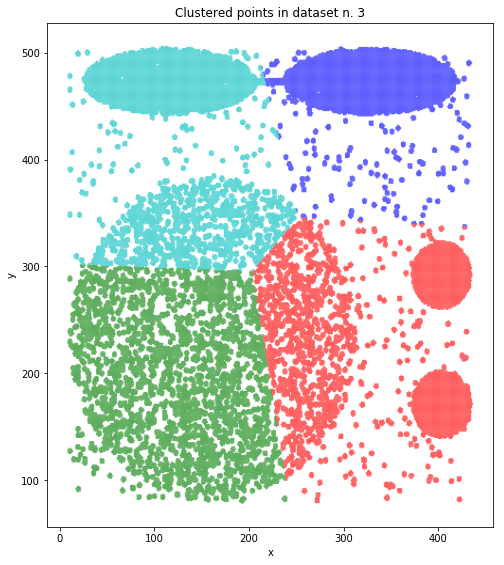

In [10]:
fig = plt.figure(figsize=(8,8))

ax = fig.add_subplot(111)
fig.subplots_adjust(top=1)
ax.set_title('Clustered points in dataset n. 3')

ax.set_xlabel('x')
ax.set_ylabel('y')

# set the list of colors to be selected when plotting the different clusters
color=['b','g','r','c','m','y','k','w']
    
#plot the dataset
for clu in range(k):
    # collect the sequence of cooordinates of the points in each given cluster (determined by clu)
    data_list_x = [data3[i,0] for i in range(n_samples3) if kmeans3.labels_[i]==clu]
    data_list_y = [data3[i,1] for i in range(n_samples3) if kmeans3.labels_[i]==clu]
    plt.scatter(data_list_x, data_list_y, s=2, edgecolors='none', c=color[clu], alpha=0.5)

plt.show()

In the following cells I propose you to write a program that computes with a statistical measure of your choice a quantitative evaluation of clusters in the three datasets.
It is advisable to execute K-means a certain number of times (let us try 10 times) and then select the clustering solution that gives the best value of the evaluation measure.

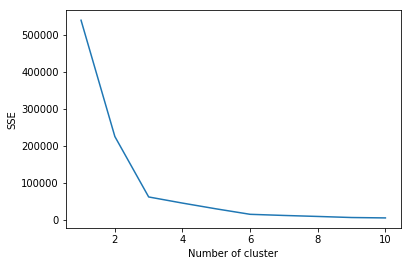

In [11]:
#evaluation on 1st dataset
sse = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(data1)
    #print(data["clusters"])
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

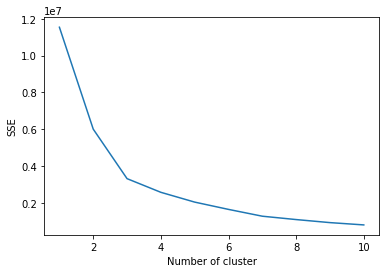

In [12]:
#evaluation on 2nd dataset
sse = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(data2)
    #print(data["clusters"])
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

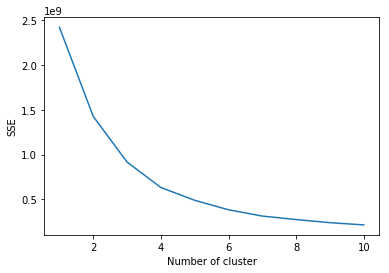

In [13]:
#evaluation on 3rd dataset
sse = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(data3)
    #print(data["clusters"])
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

# Silhouttes for the 1st dataset

For n_clusters = 2 The average silhouette_score is : 0.5651096232579514
For n_clusters = 3 The average silhouette_score is : 0.7229402453727759
For n_clusters = 4 The average silhouette_score is : 0.6825234611999134
For n_clusters = 5 The average silhouette_score is : 0.6358957746571624
For n_clusters = 6 The average silhouette_score is : 0.6113126050223654
For n_clusters = 7 The average silhouette_score is : 0.5958820524446052
For n_clusters = 8 The average silhouette_score is : 0.5800468615388642
For n_clusters = 9 The average silhouette_score is : 0.5653054229289803
For n_clusters = 10 The average silhouette_score is : 0.5549207814672741


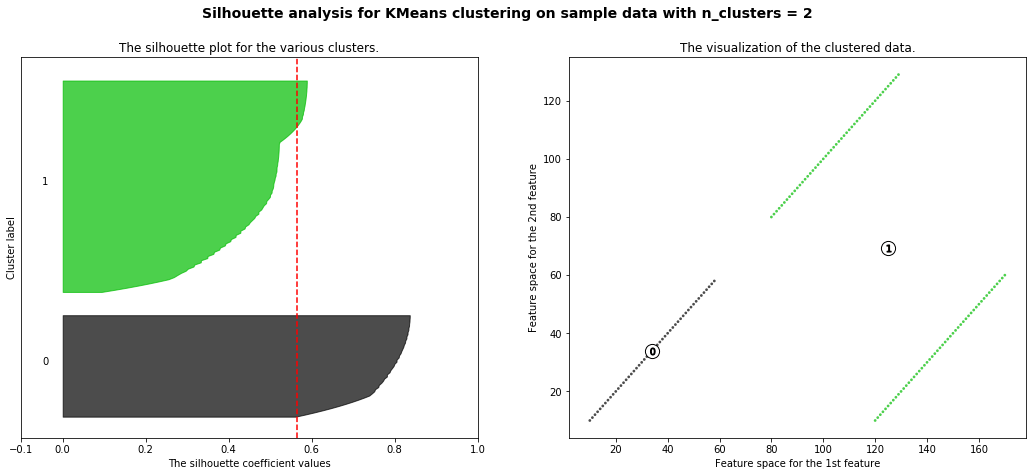

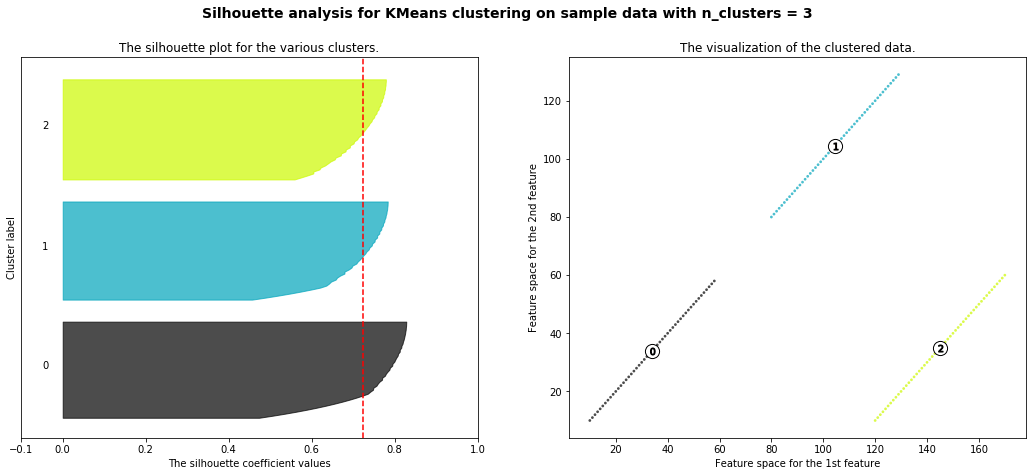

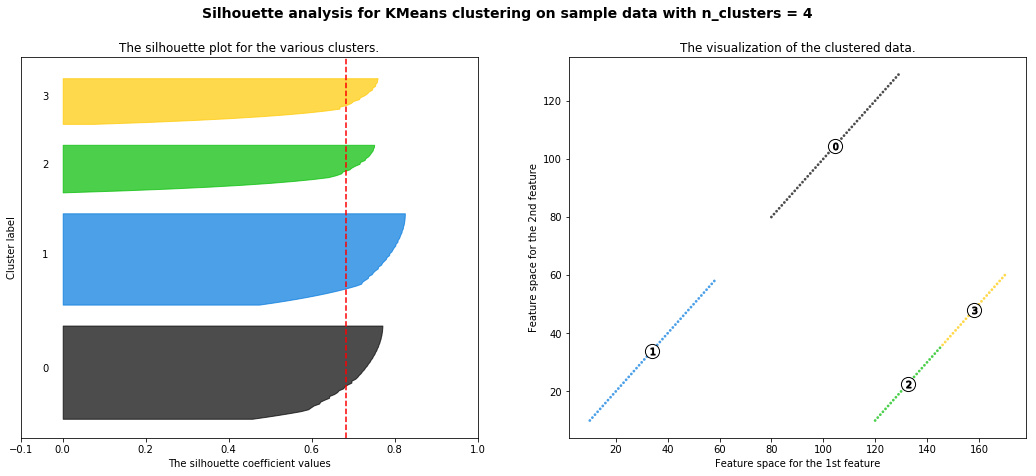

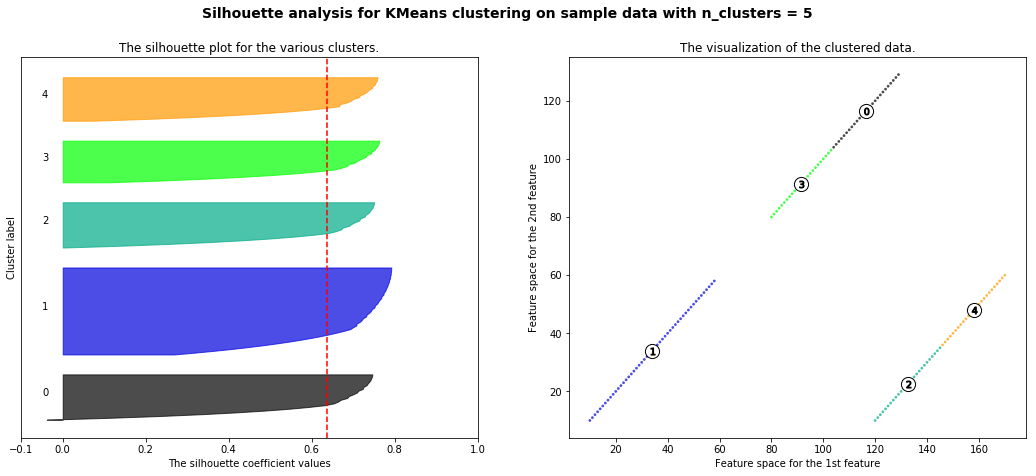

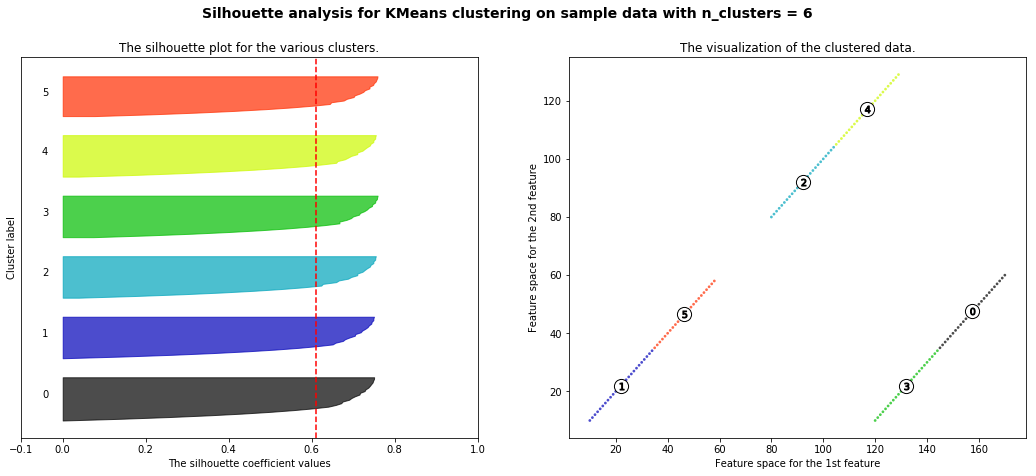

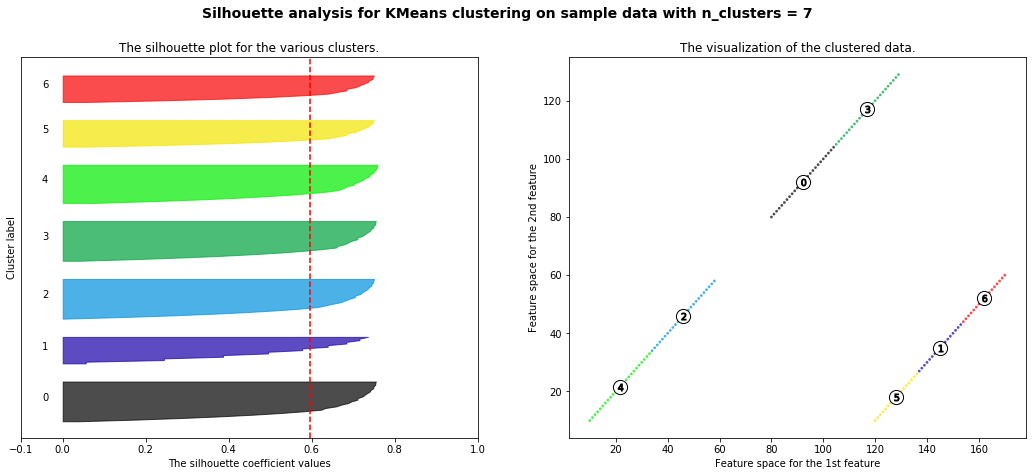

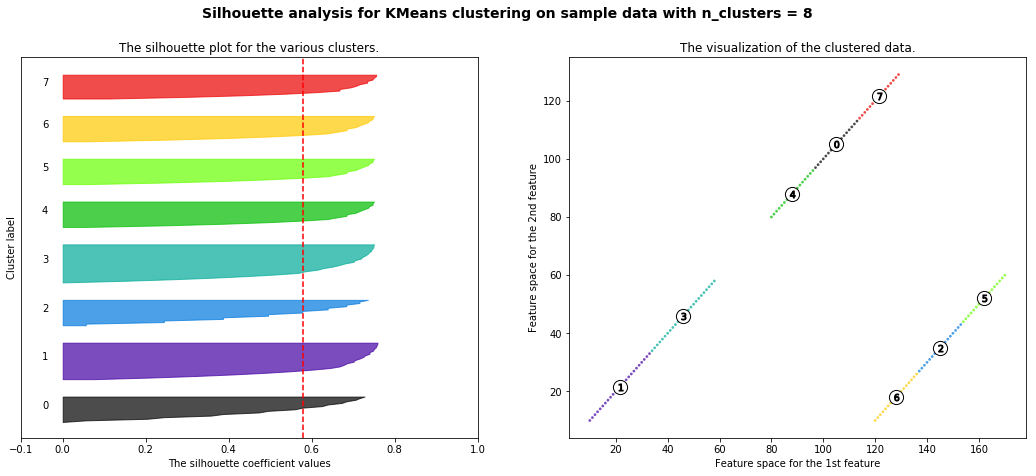

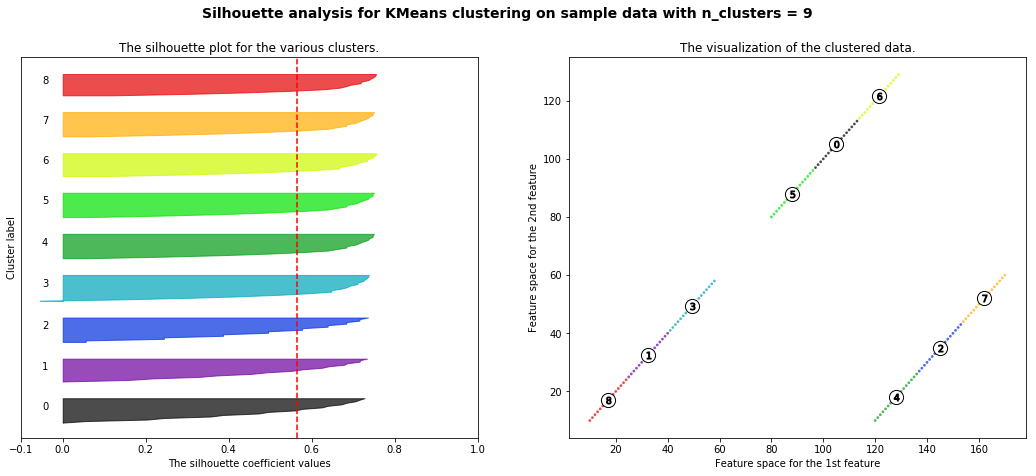

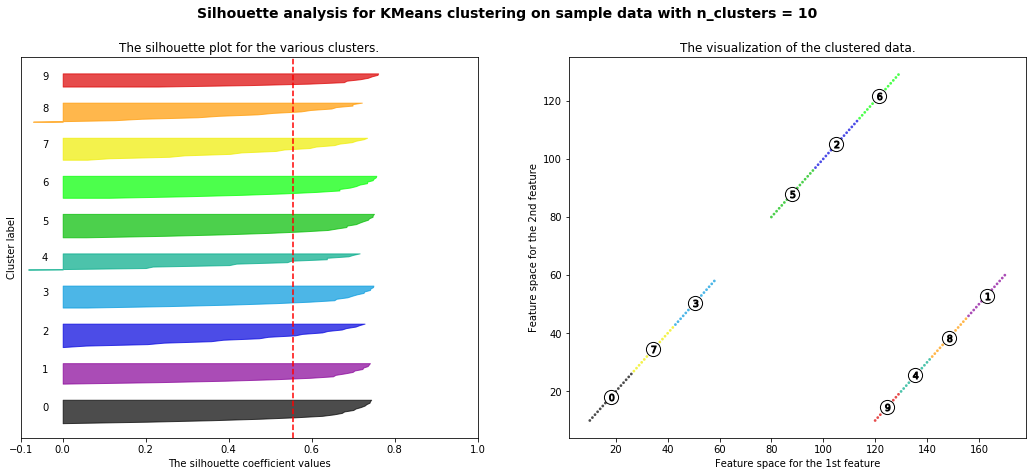

In [20]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
for n_clusters in range(2,11):
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(data1) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(data1)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(data1, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(data1, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(data1[:, 0], data1[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

# Silhouettes for the 2nd dataset

For n_clusters = 2 The average silhouette_score is : 0.43322366812579544
For n_clusters = 3 The average silhouette_score is : 0.47978199225806895
For n_clusters = 4 The average silhouette_score is : 0.41736481925553526
For n_clusters = 5 The average silhouette_score is : 0.425495255705159
For n_clusters = 6 The average silhouette_score is : 0.41271666962776615
For n_clusters = 7 The average silhouette_score is : 0.4339724811813683
For n_clusters = 8 The average silhouette_score is : 0.44518530934398787
For n_clusters = 9 The average silhouette_score is : 0.4480235563320089
For n_clusters = 10 The average silhouette_score is : 0.43998690208214625


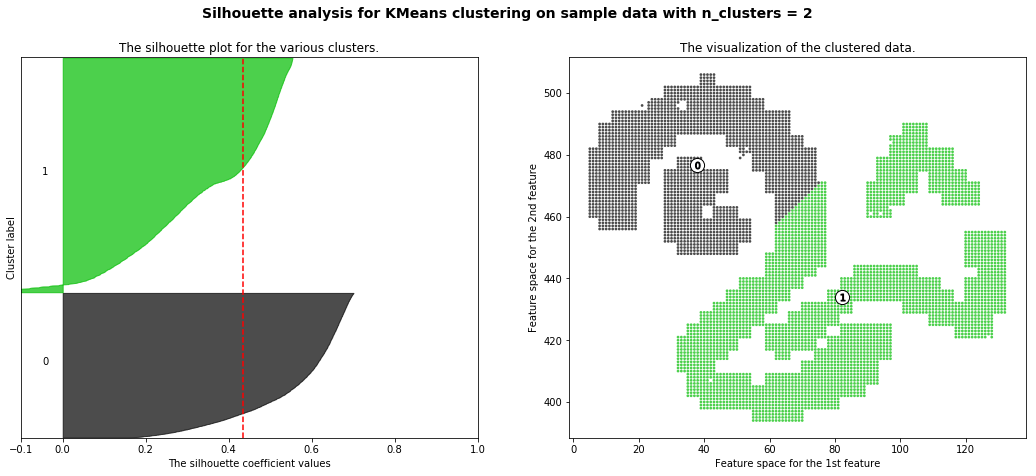

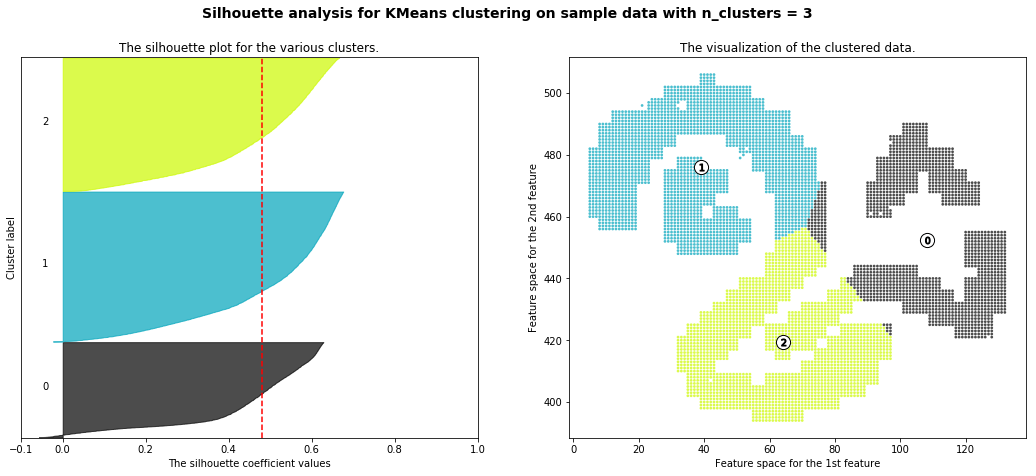

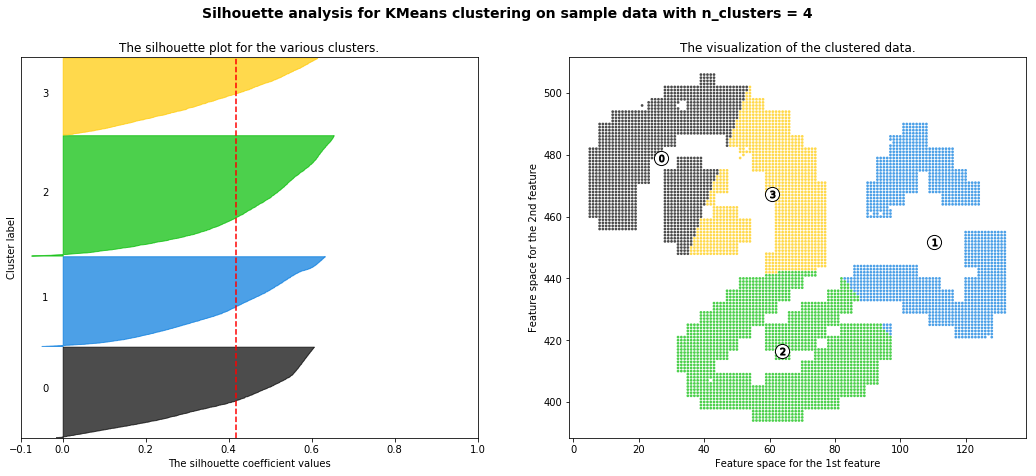

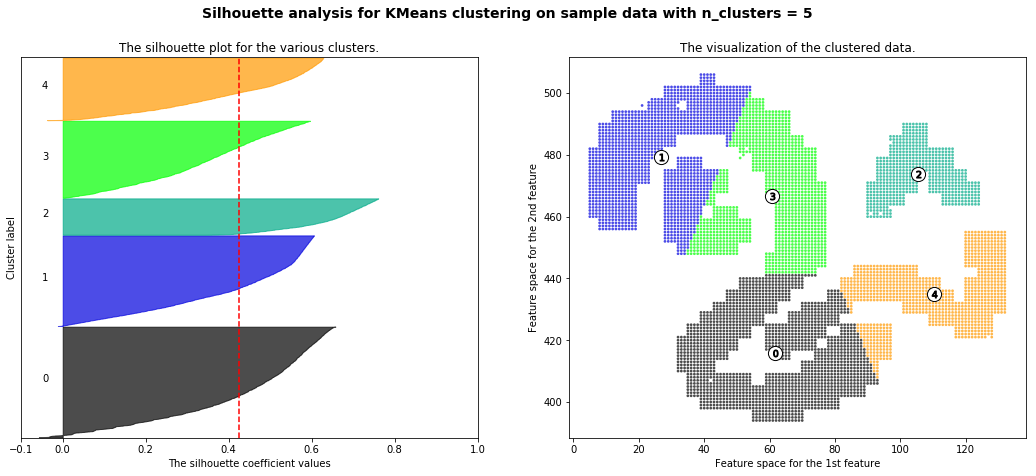

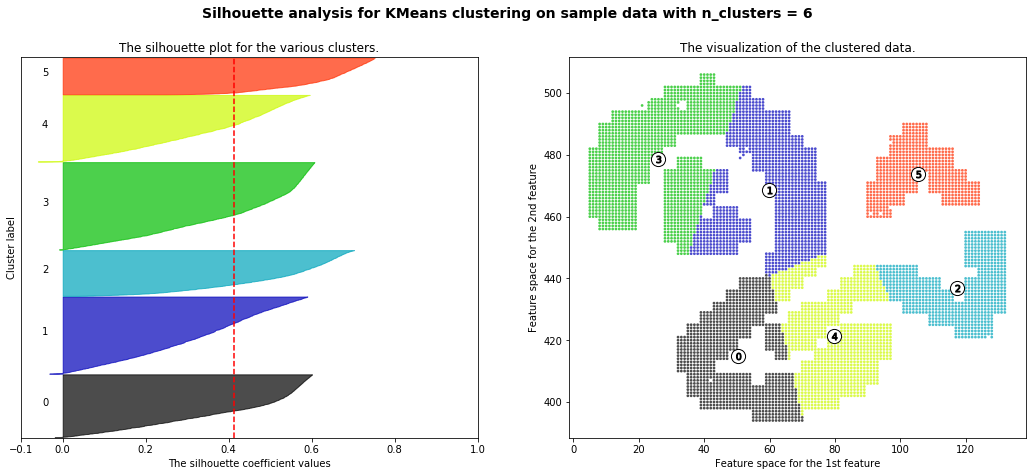

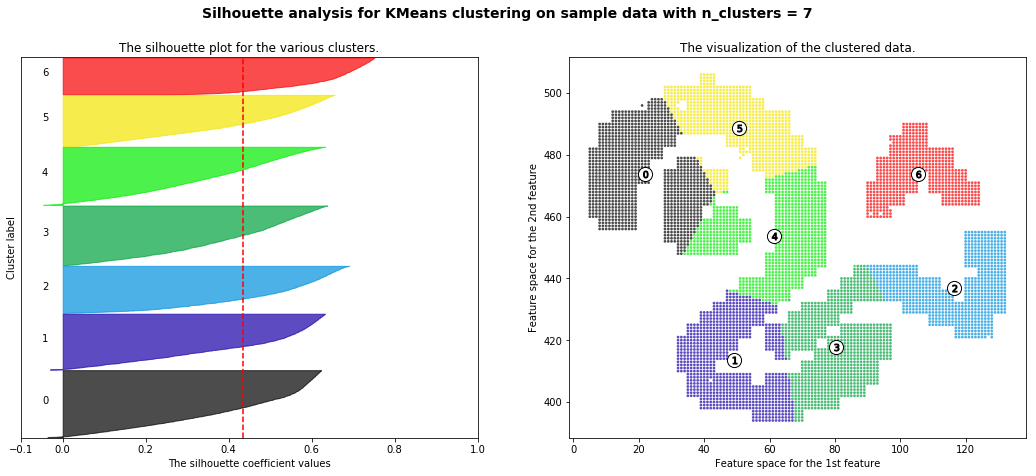

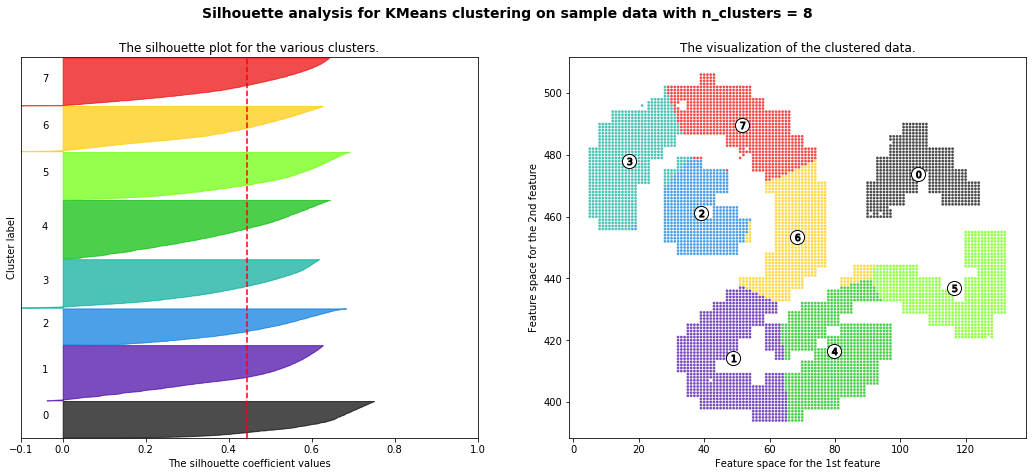

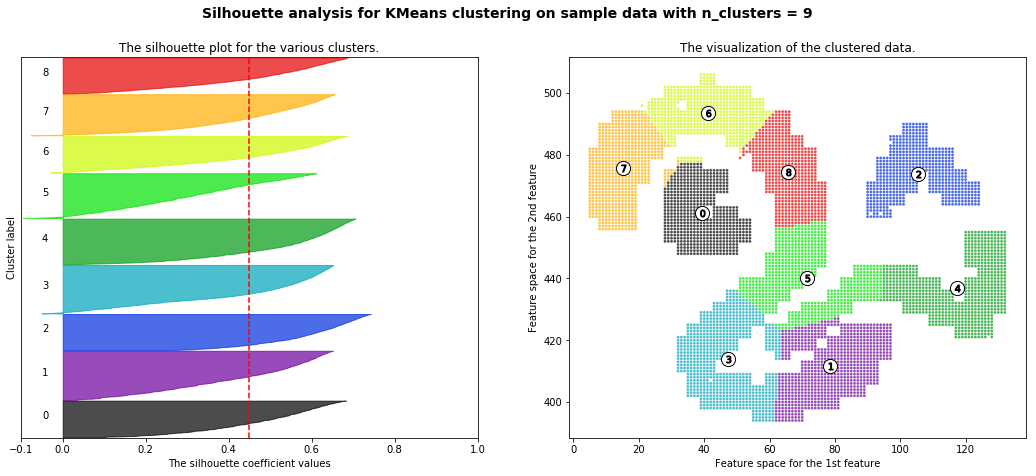

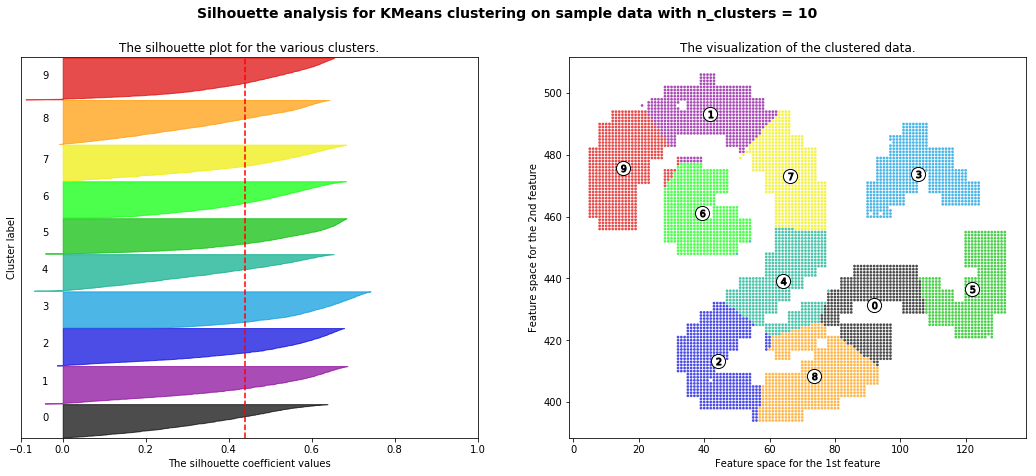

In [21]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
for n_clusters in range(2,11):
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(data2) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(data2)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(data2, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(data2, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(data2[:, 0], data2[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

# Silhouttes for the 3rd dataset
Troppo pesante, mi satura la RAM

In [ ]:
'''from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
for n_clusters in range(2,11):
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(data3) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(data3)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(data3, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(data3, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(data3[:, 0], data3[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()'''